# Основы Pandas

Проведите максимально полный анализ набора данных, включая его предобработку для моделирования (удаление неполных данных, заполнение неполных данных и т.д.) и визуализацию. 

Форма сдачи задания: zip архив, содержащий jupyter notebook с отчетом и кодом обработки данных, pdf из этого jupyter notebook, а также бинарный файл pickle с подготовленным к моделированию набором данных, прикрепленный к данному заданию.

In [1]:
# all imports at the top
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from chembl_webresource_client.utils import utils
from chembl_webresource_client.new_client import new_client
import time
from tqdm import tqdm


import warnings 
warnings.filterwarnings('ignore')

# 1. Настройка pandas`a

In [2]:
# Настройки pandas`a
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

# 2. Первый взгляд на данные

In [3]:
df = pd.read_csv('dataset_var_4.csv', sep=';')
length_old_df = len(df)
df.head()

,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
0,3564,CHEMBL3301604,RALINEPAG,APD-811|APD811|RALINE...,Small molecule,3,431.92,24.0,113.0,5.52,76.07,4.0,1.0,1.0,8.0,N,0.59,4.10,NaN,5.12,2.02,2.0,MOL,0,30.0,6.0,1.0,1.0,431.1500,ACID,C23H26ClNO5,O=C(O)COC[C@H]1CC[C@H...,NPDKXVKJRHPDQT-IYARVY...
1,3622,CHEMBL1201479,POLYETHYLENE GLYCOL 3350,GLYCOLAX|MIRALAX|POLY...,Small molecule,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2634,CHEMBL1214124,PERAMPANEL,E-2007|E2007|ER-15505...,Small molecule,4,349.39,11.0,42.0,4.44,58.68,4.0,0.0,0.0,3.0,N,0.55,NaN,4.01,4.11,4.11,4.0,MOL,0,27.0,4.0,0.0,0.0,349.1215,NEUTRAL,C23H15N3O,N#Cc1ccccc1-c1cc(-c2c...,PRMWGUBFXWROHD-UHFFFA...
3,153,CHEMBL1200585,OXYMETHOLONE,ANADROL-50|ANAPOLON|A...,Small molecule,4,332.48,140.0,651.0,4.40,57.53,3.0,2.0,0.0,0.0,N,0.51,8.87,NaN,3.55,3.54,0.0,MOL,0,24.0,3.0,2.0,0.0,332.2351,NEUTRAL,C21H32O3,C[C@]12C/C(=C/O)C(=O)...,ICMWWNHDUZJFDW-DHODBP...
4,5689,CHEMBL116,AMPRENAVIR,141 W94|141W94|AMPREN...,Small molecule,4,505.64,147.0,1199.0,2.40,131.19,7.0,3.0,1.0,11.0,N,0.40,13.61,2.39,2.43,2.43,2.0,MOL,0,35.0,9.0,4.0,1.0,505.2247,NEUTRAL,C25H35N3O6S,CC(C)CN(C[C@@H](O)[C@...,YMARZQAQMVYCKC-OEMFJL...


In [4]:
f"Объем даты до обработки: {(df.memory_usage(deep = True).sum() / (1024 ** 2)):.2f} Mb"

'Объем даты до обработки: 0.84 Mb'

,Unnamed: 0,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic)
count,1000.0000,1000.0000,941.0000,728.0000,728.0000,864.0000,864.0000,864.0000,864.0000,864.0000,864.0000,864.0000,541.0000,563.0000,864.0000,864.0000,864.0000,1000.0000,864.0000,864.0000,864.0000,864.0000,941.0000
mean,3493.1240,2.9480,416.0186,69.1140,309.4725,2.9091,86.0269,5.1933,2.0081,0.4421,5.5394,0.5286,7.7216,6.7848,2.3997,1.2839,1.9086,0.0210,27.0289,6.2373,2.2188,0.4919,395.1089
std,2059.6884,1.1307,210.2546,137.9525,772.6467,2.2861,52.8337,2.9221,1.8060,0.7845,4.1525,0.2168,4.2589,2.9347,2.5428,3.0733,1.3504,0.1435,10.8734,3.4845,2.0683,0.8530,196.0626
min,3.0000,1.0000,39.1000,1.0000,1.0000,-8.4200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0300,-3.9100,0.0000,-8.5800,-15.1000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,38.9637
25%,1699.2500,2.0000,287.4500,6.0000,15.0000,1.6675,52.8825,3.0000,1.0000,0.0000,3.0000,0.3800,3.7400,4.7550,1.1125,-0.1925,1.0000,0.0000,20.0000,4.0000,1.0000,0.0000,273.1477
50%,3451.0000,3.0000,393.3600,17.0000,52.0000,2.9800,78.7400,5.0000,2.0000,0.0000,5.0000,0.5400,8.4600,7.4600,2.6100,1.7850,2.0000,0.0000,27.0000,6.0000,2.0000,0.0000,377.1674
75%,5288.5000,4.0000,494.5900,55.0000,199.7500,4.2800,106.9975,7.0000,3.0000,1.0000,7.0000,0.7100,11.6700,9.1500,3.9500,3.2200,3.0000,0.0000,33.0000,8.0000,3.0000,1.0000,474.2379
max,7072.0000,4.0000,2715.3200,1334.0000,6891.0000,10.4800,404.4500,21.0000,15.0000,4.0000,44.0000,0.9300,13.9900,12.2500,12.6700,12.6700,8.0000,1.0000,69.0000,27.0000,18.0000,4.0000,2329.2744


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   ChEMBL ID                        1000 non-null   object 
 2   Name                             1000 non-null   object 
 3   Synonyms                         986 non-null    object 
 4   Type                             1000 non-null   object 
 5   Max Phase                        1000 non-null   int64  
 6   Molecular Weight                 941 non-null    float64
 7   Targets                          728 non-null    float64
 8   Bioactivities                    728 non-null    float64
 9   AlogP                            864 non-null    float64
 10  Polar Surface Area               864 non-null    float64
 11  HBA                              864 non-null    float64
 12  HBD                  

None

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Max Phase'}>,
        <Axes: title={'center': 'Molecular Weight'}>,
        <Axes: title={'center': 'Targets'}>,
        <Axes: title={'center': 'Bioactivities'}>],
       [<Axes: title={'center': 'AlogP'}>,
        <Axes: title={'center': 'Polar Surface Area'}>,
        <Axes: title={'center': 'HBA'}>, <Axes: title={'center': 'HBD'}>,
        <Axes: title={'center': '#RO5 Violations'}>],
       [<Axes: title={'center': '#Rotatable Bonds'}>,
        <Axes: title={'center': 'QED Weighted'}>,
        <Axes: title={'center': 'CX Acidic pKa'}>,
        <Axes: title={'center': 'CX Basic pKa'}>,
        <Axes: title={'center': 'CX LogP'}>],
       [<Axes: title={'center': 'CX LogD'}>,
        <Axes: title={'center': 'Aromatic Rings'}>,
        <Axes: title={'center': 'Inorganic Flag'}>,
        <Axes: title={'center': 'Heavy Atoms'}>,
        <Axes: title={'center': 'HBA (Lipinski)'}>],
       [<Axes: title={'ce

,0
Unnamed: 0,0.000000
ChEMBL ID,0.000000
Name,0.000000
Synonyms,1.000000
Type,0.000000
Max Phase,0.000000
Molecular Weight,6.000000
Targets,27.000000
Bioactivities,27.000000
AlogP,14.000000


,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key


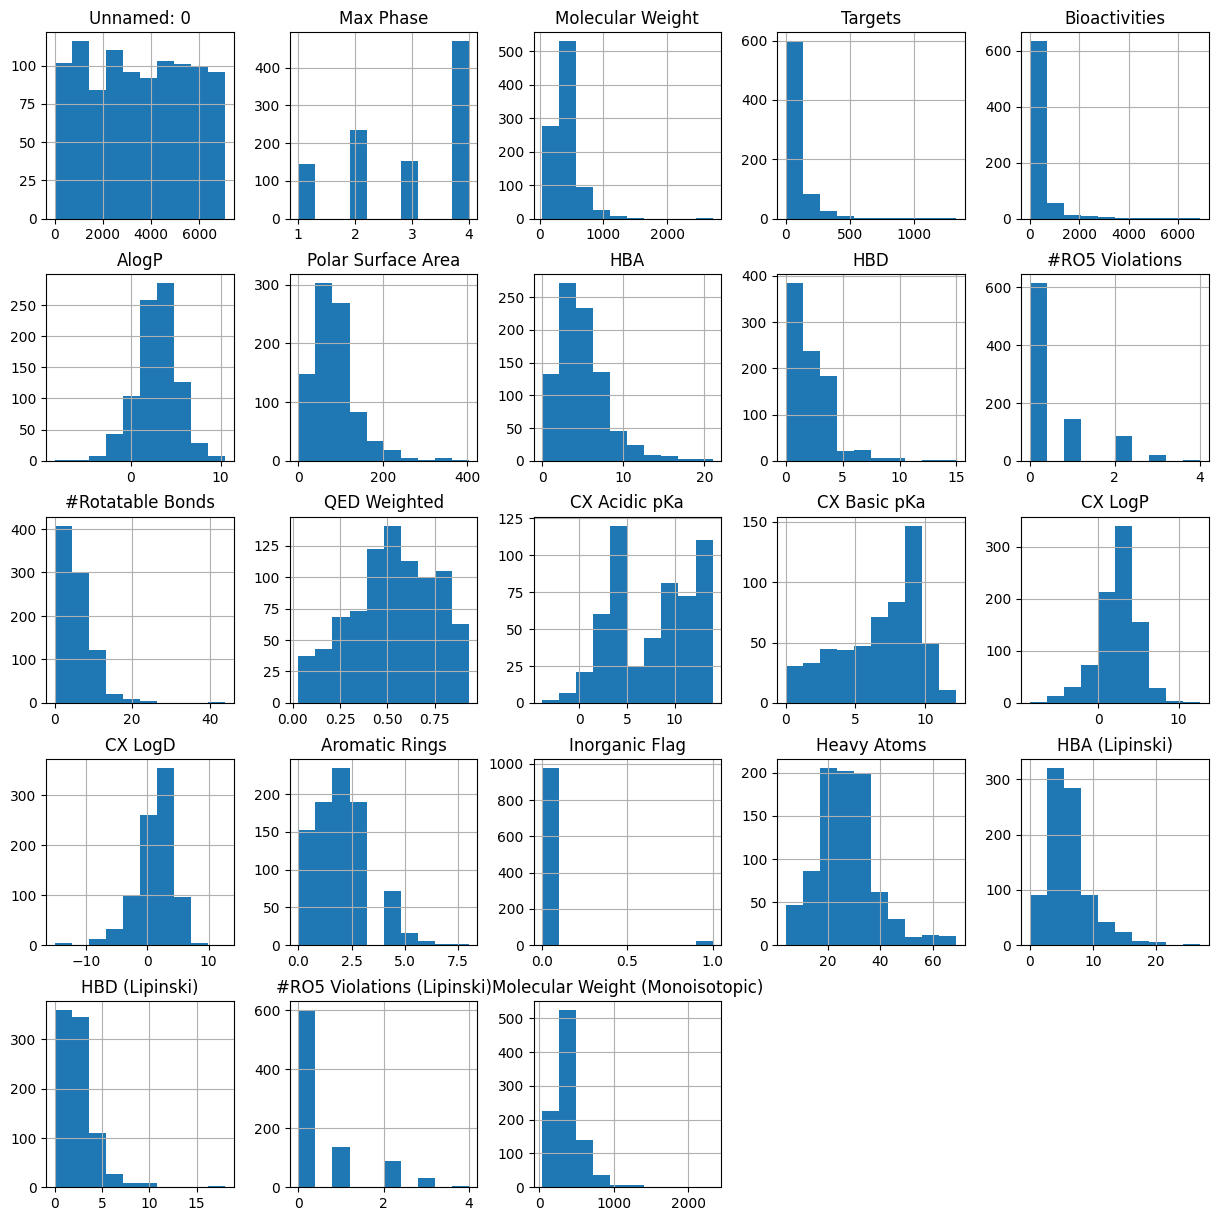

In [5]:
display(df.describe())
display(df.info())
display(df.hist(figsize = (15,15))) 
display(pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('BuPu')) # Количествопропусков в %
display(df[df.duplicated()]) # Проверка на явные дубликаты

> * Наблюдаем одинаковый процент пропусков у некоторых признаков:
> *            молекулярный вес, молекулярный вес (моноизотопный) молекулярная формула- 6%
> *            smies, inchi key - 9%
> *            AlogP, Polar Surface Area, HBA, HBD, RO5 Violations, Rotatable Bonds, Passes Ro3, QED Weighted, CX LogP, CX LogD, Aromatic Rings, Heavy Atom, HBA (Lipinski), HBD (Lipinski), RO5 Violations (Lipinski) - 14% 
> *  `Скорее всего, эти признаки одинаково отсуствуют во всей строке у молекулы. То есть восстановить признаки с процентом пропуска 14 вряд ли получится. Аналогично с молекулярным весом: не получится восстановить вес по молекулярной формуле`
> * Названия колонок нужно привести к питоновскому_виду
> * Удалить неинформатифную волонку 'Unnamed: 0'
> * Поработать с пропусками: заполнить или удалить
> * Преобразовать типы данных: поработать над уменьшением размера файла в целом

-----

# 3. Работа с данными: Python-way, типы данных. 

------

In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Molecular Species',
       'Molecular Formula', 'Smiles', 'Inchi Key'],
      dtype='object')

In [7]:
molecule = new_client.molecule
print(type(molecule))
print(molecule[0]) # molecule - list

<class 'chembl_webresource_client.query_set.QuerySet'>
{'atc_classifications': [], 'availability_type': -1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': None, 'chemical_probe': 0, 'chirality': -1, 'cross_references': [], 'dosed_ingredient': False, 'first_approval': None, 'first_in_class': -1, 'helm_notation': None, 'indication_class': None, 'inorganic_flag': -1, 'max_phase': None, 'molecule_chembl_id': 'CHEMBL6329', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL6329', 'molecule_chembl_id': 'CHEMBL6329', 'parent_chembl_id': 'CHEMBL6329'}, 'molecule_properties': {'alogp': '2.11', 'aromatic_rings': 3, 'cx_logd': '2.69', 'cx_logp': '3.63', 'cx_most_apka': '6.48', 'cx_most_bpka': None, 'full_molformula': 'C17H12ClN3O3', 'full_mwt': '341.75', 'hba': 5, 'hba_lipinski': 6, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 24, 'molecular_species': 'ACID', 'mw_freebase': '341.75', 'mw_monoisotopic': '341.0567', 'np_likeness_score': '-1.56', 'num_lipinski_ro5_violations': 0, 'num

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(r"[#()]", "", regex=True)

In [9]:
# Так как я знаю, что данные взяты с БД CheMBL, то преобразуем колонки в тот вид, в котором они хранятся в этой БД
# Проще, лучше и быстрее сделать это вручную, а не через regex
# Но с regex можно придумать какой-нибудь pipeline
df = df.rename(columns={'molecular_weight': 'mw_freebase',
                        'ro5_violations': 'num_ro5_violations',
                        'passes_ro3': 'ro3_pass',
                        'cx_acidic_pka': 'cx_most_apka',
                        'cx_basic_pka': 'cx_most_bpka',
                        'ro5_violations_lipinski': 'num_lipinski_ro5_violations',
                        'molecular_weight_monoisotopic': 'mw_monoisotopic',
                        'molecular_formula': 'full_molformula',
                        'smiles': 'canonical_smiles',
                        'inchi_key': 'standard_inchi_key'})

In [10]:
df.head()

,chembl_id,name,synonyms,type,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,structure_type,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species,full_molformula,canonical_smiles,standard_inchi_key
0,CHEMBL3301604,RALINEPAG,APD-811|APD811|RALINE...,Small molecule,3,431.92,24.0,113.0,5.52,76.07,4.0,1.0,1.0,8.0,N,0.59,4.10,NaN,5.12,2.02,2.0,MOL,0,30.0,6.0,1.0,1.0,431.1500,ACID,C23H26ClNO5,O=C(O)COC[C@H]1CC[C@H...,NPDKXVKJRHPDQT-IYARVY...
1,CHEMBL1201479,POLYETHYLENE GLYCOL 3350,GLYCOLAX|MIRALAX|POLY...,Small molecule,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1214124,PERAMPANEL,E-2007|E2007|ER-15505...,Small molecule,4,349.39,11.0,42.0,4.44,58.68,4.0,0.0,0.0,3.0,N,0.55,NaN,4.01,4.11,4.11,4.0,MOL,0,27.0,4.0,0.0,0.0,349.1215,NEUTRAL,C23H15N3O,N#Cc1ccccc1-c1cc(-c2c...,PRMWGUBFXWROHD-UHFFFA...
3,CHEMBL1200585,OXYMETHOLONE,ANADROL-50|ANAPOLON|A...,Small molecule,4,332.48,140.0,651.0,4.40,57.53,3.0,2.0,0.0,0.0,N,0.51,8.87,NaN,3.55,3.54,0.0,MOL,0,24.0,3.0,2.0,0.0,332.2351,NEUTRAL,C21H32O3,C[C@]12C/C(=C/O)C(=O)...,ICMWWNHDUZJFDW-DHODBP...
4,CHEMBL116,AMPRENAVIR,141 W94|141W94|AMPREN...,Small molecule,4,505.64,147.0,1199.0,2.40,131.19,7.0,3.0,1.0,11.0,N,0.40,13.61,2.39,2.43,2.43,2.0,MOL,0,35.0,9.0,4.0,1.0,505.2247,NEUTRAL,C25H35N3O6S,CC(C)CN(C[C@@H](O)[C@...,YMARZQAQMVYCKC-OEMFJL...


> * Непонятно, что находится в колонке targets. По идее, там должно быть  название белка в формате str.
> * В колонки bioactivities тоже

# 4. Попытка восстановления данных

In [11]:
molecule = new_client.molecule
print(type(molecule))
print(molecule[0]) # molecule - list

<class 'chembl_webresource_client.query_set.QuerySet'>
{'atc_classifications': [], 'availability_type': -1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': None, 'chemical_probe': 0, 'chirality': -1, 'cross_references': [], 'dosed_ingredient': False, 'first_approval': None, 'first_in_class': -1, 'helm_notation': None, 'indication_class': None, 'inorganic_flag': -1, 'max_phase': None, 'molecule_chembl_id': 'CHEMBL6329', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL6329', 'molecule_chembl_id': 'CHEMBL6329', 'parent_chembl_id': 'CHEMBL6329'}, 'molecule_properties': {'alogp': '2.11', 'aromatic_rings': 3, 'cx_logd': '2.69', 'cx_logp': '3.63', 'cx_most_apka': '6.48', 'cx_most_bpka': None, 'full_molformula': 'C17H12ClN3O3', 'full_mwt': '341.75', 'hba': 5, 'hba_lipinski': 6, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 24, 'molecular_species': 'ACID', 'mw_freebase': '341.75', 'mw_monoisotopic': '341.0567', 'np_likeness_score': '-1.56', 'num_lipinski_ro5_violations': 0, 'num

In [12]:
m = molecule.filter(chembl_id ="CHEMBL1201479")
m

[{'atc_classifications': [], 'availability_type': 2, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': None, 'chemical_probe': 0, 'chirality': 1, 'cross_references': [{'xref_id': 'polyethylene%20glycol%203350', 'xref_name': 'polyethylene glycol 3350', 'xref_src': 'DailyMed'}], 'dosed_ingredient': True, 'first_approval': 1984, 'first_in_class': 0, 'helm_notation': None, 'indication_class': None, 'inorganic_flag': 0, 'max_phase': '4.0', 'molecule_chembl_id': 'CHEMBL1201479', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL1201479', 'molecule_chembl_id': 'CHEMBL1201479', 'parent_chembl_id': 'CHEMBL1201479'}, 'molecule_properties': None, 'molecule_structures': None, 'molecule_synonyms': [{'molecule_synonym': 'Glycolax', 'syn_type': 'TRADE_NAME', 'synonyms': 'GLYCOLAX'}, {'molecule_synonym': 'Miralax', 'syn_type': 'TRADE_NAME', 'synonyms': 'MIRALAX'}, {'molecule_synonym': 'Polyethylene glycol 3350', 'syn_type': 'FDA', 'synonyms': 'POLYETHYLENE GLYCOL 3350'}, {'molecule_synon

In [13]:
mol_keys = [keys for keys in molecule[0]]
display(mol_keys)
len(mol_keys)

['atc_classifications',
 'availability_type',
 'biotherapeutic',
 'black_box_warning',
 'chebi_par_id',
 'chemical_probe',
 'chirality',
 'cross_references',
 'dosed_ingredient',
 'first_approval',
 'first_in_class',
 'helm_notation',
 'indication_class',
 'inorganic_flag',
 'max_phase',
 'molecule_chembl_id',
 'molecule_hierarchy',
 'molecule_properties',
 'molecule_structures',
 'molecule_synonyms',
 'molecule_type',
 'natural_product',
 'oral',
 'orphan',
 'parenteral',
 'polymer_flag',
 'pref_name',
 'prodrug',
 'structure_type',
 'therapeutic_flag',
 'topical',
 'usan_stem',
 'usan_stem_definition',
 'usan_substem',
 'usan_year',
 'withdrawn_flag']

36

In [14]:
set(df.columns) & set(molecule[0]['molecule_properties']) # Общие фичи (причем они хранятся в "molecule_properties")

{'alogp',
 'aromatic_rings',
 'cx_logd',
 'cx_logp',
 'cx_most_apka',
 'cx_most_bpka',
 'full_molformula',
 'hba',
 'hba_lipinski',
 'hbd',
 'hbd_lipinski',
 'heavy_atoms',
 'molecular_species',
 'mw_freebase',
 'mw_monoisotopic',
 'num_lipinski_ro5_violations',
 'num_ro5_violations',
 'qed_weighted',
 'ro3_pass'}

In [15]:
display(set(df.columns) - set(molecule[0]['molecule_properties'])) # Оставшиеся фичи в датафрейме, который нет в "molecule_properties"
other_features1 = set(df.columns) - set(molecule[0]['molecule_properties'])

{'bioactivities',
 'canonical_smiles',
 'chembl_id',
 'inorganic_flag',
 'max_phase',
 'name',
 'polar_surface_area',
 'rotatable_bonds',
 'standard_inchi_key',
 'structure_type',
 'synonyms',
 'targets',
 'type'}

In [16]:
display(other_features1 - set(molecule[0])) # Смотрим оставшиеся фичи по всему словарю 
other_features2 = other_features1 - set(molecule[0])

{'bioactivities',
 'canonical_smiles',
 'chembl_id',
 'name',
 'polar_surface_area',
 'rotatable_bonds',
 'standard_inchi_key',
 'synonyms',
 'targets',
 'type'}

In [17]:
display(other_features2 - set(molecule[0]["molecule_structures"]))
other_features3 = other_features2 - set(molecule[0]["molecule_structures"])
display(other_features3) # Оставшиеся фичи, которых  не нашлось в БД 

{'bioactivities',
 'chembl_id',
 'name',
 'polar_surface_area',
 'rotatable_bonds',
 'synonyms',
 'targets',
 'type'}

{'bioactivities',
 'chembl_id',
 'name',
 'polar_surface_area',
 'rotatable_bonds',
 'synonyms',
 'targets',
 'type'}

In [18]:
activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL25")
"bioactivities" in set(res[0])

False

> * В целом можно продолжить без этих фичей

In [19]:
df.head(2)

,chembl_id,name,synonyms,type,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,structure_type,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species,full_molformula,canonical_smiles,standard_inchi_key
0,CHEMBL3301604,RALINEPAG,APD-811|APD811|RALINE...,Small molecule,3,431.92,24.0,113.0,5.52,76.07,4.0,1.0,1.0,8.0,N,0.59,4.1,NaN,5.12,2.02,2.0,MOL,0,30.0,6.0,1.0,1.0,431.15,ACID,C23H26ClNO5,O=C(O)COC[C@H]1CC[C@H...,NPDKXVKJRHPDQT-IYARVY...
1,CHEMBL1201479,POLYETHYLENE GLYCOL 3350,GLYCOLAX|MIRALAX|POLY...,Small molecule,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
necessary_features = list(set(df.columns) & set(molecule[0]['molecule_properties'])) # фичи, которые будем заполнять
necessary_features.insert(0, "chembl_id")

# necessary_structures = list(other_features2 & set(molecule[0]["molecule_structures"]))
# necessary_features_all_dict = list(other_features1 & set(molecule[0]))

In [21]:
list(df["chembl_id"])

['CHEMBL3301604',
 'CHEMBL1201479',
 'CHEMBL1214124',
 'CHEMBL1200585',
 'CHEMBL116',
 'CHEMBL403',
 'CHEMBL1279',
 'CHEMBL4297217',
 'CHEMBL4297405',
 'CHEMBL583',
 'CHEMBL2108535',
 'CHEMBL195923',
 'CHEMBL4297273',
 'CHEMBL23330',
 'CHEMBL3545296',
 'CHEMBL561132',
 'CHEMBL607048',
 'CHEMBL452861',
 'CHEMBL1200991',
 'CHEMBL1201045',
 'CHEMBL1195136',
 'CHEMBL3668014',
 'CHEMBL685',
 'CHEMBL1201047',
 'CHEMBL95',
 'CHEMBL1200932',
 'CHEMBL1230609',
 'CHEMBL65794',
 'CHEMBL551466',
 'CHEMBL3545411',
 'CHEMBL284642',
 'CHEMBL1201263',
 'CHEMBL1774080',
 'CHEMBL333950',
 'CHEMBL600325',
 'CHEMBL14376',
 'CHEMBL2105694',
 'CHEMBL1933350',
 'CHEMBL1454',
 'CHEMBL1200715',
 'CHEMBL398338',
 'CHEMBL1193948',
 'CHEMBL1950649',
 'CHEMBL2048484',
 'CHEMBL1201478',
 'CHEMBL1200654',
 'CHEMBL1200983',
 'CHEMBL406393',
 'CHEMBL111861',
 'CHEMBL1201042',
 'CHEMBL4298064',
 'CHEMBL3989571',
 'CHEMBL454',
 'CHEMBL4297382',
 'CHEMBL1492500',
 'CHEMBL4650363',
 'CHEMBL184',
 'CHEMBL4297610',
 'CHEMBL

In [22]:
chembl_ids = list(df["chembl_id"])[:50] # Извлечем первые 50 id, чтобы было примерно понятно, что предполагалось сделать

In [23]:
# # Извлечем только molecule_properties
# def chembl_features(chembl_id, features, structures):
#     result = {"chembl_id": chembl_id}
#     result.update({feature: np.nan for feature in features if feature != "chembl_id"}) # Изначально все nan

#     try:
#         # Запрос к ChEMBL API
#         molecule = new_client.molecule.get(chembl_id)
#         if molecule is not None:
#             properties = molecule.get("molecule_properties")            
#             for feature in features:
#                 if feature != "chembl_id":
#                     result[feature] = properties.get(feature, np.nan) # возвращаем значение значений (в ином случае nan)
#         else:
#             print(f"ChEMBL ID {chembl_id} не найден.")
#     except Exception as e:
#         print(f"Ошибка при обработке {chembl_id}: {e}")
#     time.sleep(30)  # Принудительный сон
#     return result

In [24]:
# extracted_data = [
#     chembl_features(chembl_id, necessary_features, necessary_structures)
#     for chembl_id in tqdm(chembl_ids, desc="Извлечение данных ☃️☃️☃️")
# ]

In [25]:
# # Создадим новую дату, чтобы не портить старую
# new_df = pd.DataFrame(extracted_data, columns=necessary_features)
# new_df.to_csv("my_example_data.csv", index=False) # сохраним
# new_df.head()

> * Была произведена попытка извлечений данных через питоновскую библиотеку, но идея оказалась провальной так как периодически возникала ошибка 404: `Ошибка при обработке CHEMBL3545296: HTTPSConnectionPool(host='www.ebi.ac.uk', port=443): Max retries exceeded with url: /chembl/api/data/molecule/CHEMBL3545296 (Caused by ResponseError('too many 404 error responses'))`. Это связано с тем, что мы слишком часто обращаемся к серверу, что даже принудительный сон в 30 секунд не всегда помогает. Поэтому данные лучше извлекать с БД сразу новые и вручную.

# 5. Обработка данных

In [26]:
f"Объем даты до обработки: {(df.memory_usage(deep = True).sum() / (1024 ** 2)):.2f} Mb"

'Объем даты до обработки: 0.84 Mb'

In [27]:
display(df.head())
display(df.info())

,chembl_id,name,synonyms,type,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,structure_type,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species,full_molformula,canonical_smiles,standard_inchi_key
0,CHEMBL3301604,RALINEPAG,APD-811|APD811|RALINE...,Small molecule,3,431.92,24.0,113.0,5.52,76.07,4.0,1.0,1.0,8.0,N,0.59,4.10,NaN,5.12,2.02,2.0,MOL,0,30.0,6.0,1.0,1.0,431.1500,ACID,C23H26ClNO5,O=C(O)COC[C@H]1CC[C@H...,NPDKXVKJRHPDQT-IYARVY...
1,CHEMBL1201479,POLYETHYLENE GLYCOL 3350,GLYCOLAX|MIRALAX|POLY...,Small molecule,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1214124,PERAMPANEL,E-2007|E2007|ER-15505...,Small molecule,4,349.39,11.0,42.0,4.44,58.68,4.0,0.0,0.0,3.0,N,0.55,NaN,4.01,4.11,4.11,4.0,MOL,0,27.0,4.0,0.0,0.0,349.1215,NEUTRAL,C23H15N3O,N#Cc1ccccc1-c1cc(-c2c...,PRMWGUBFXWROHD-UHFFFA...
3,CHEMBL1200585,OXYMETHOLONE,ANADROL-50|ANAPOLON|A...,Small molecule,4,332.48,140.0,651.0,4.40,57.53,3.0,2.0,0.0,0.0,N,0.51,8.87,NaN,3.55,3.54,0.0,MOL,0,24.0,3.0,2.0,0.0,332.2351,NEUTRAL,C21H32O3,C[C@]12C/C(=C/O)C(=O)...,ICMWWNHDUZJFDW-DHODBP...
4,CHEMBL116,AMPRENAVIR,141 W94|141W94|AMPREN...,Small molecule,4,505.64,147.0,1199.0,2.40,131.19,7.0,3.0,1.0,11.0,N,0.40,13.61,2.39,2.43,2.43,2.0,MOL,0,35.0,9.0,4.0,1.0,505.2247,NEUTRAL,C25H35N3O6S,CC(C)CN(C[C@@H](O)[C@...,YMARZQAQMVYCKC-OEMFJL...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chembl_id                    1000 non-null   object 
 1   name                         1000 non-null   object 
 2   synonyms                     986 non-null    object 
 3   type                         1000 non-null   object 
 4   max_phase                    1000 non-null   int64  
 5   mw_freebase                  941 non-null    float64
 6   targets                      728 non-null    float64
 7   bioactivities                728 non-null    float64
 8   alogp                        864 non-null    float64
 9   polar_surface_area           864 non-null    float64
 10  hba                          864 non-null    float64
 11  hbd                          864 non-null    float64
 12  num_ro5_violations           864 non-null    float64
 13  rotatable_bonds    

None

In [28]:
for col in list(df.select_dtypes(include=['number']).columns) :
    print(f"Колонка {col} имеет: \n\tmax зачение {df[col].max()}  \n\tmin значение {df[col].min()} \n\tуникальные значения {df[col].unique()}")

Колонка max_phase имеет: 
	max зачение 4  
	min значение 1 
	уникальные значения [3 4 1 2]
Колонка mw_freebase имеет: 
	max зачение 2715.32  
	min значение 39.1 
	уникальные значения [ 431.92     nan  349.39  332.48  505.64  233.25  243.31  582.08  519.53
  359.4   180.16  213.61  252.19  416.47  368.48  259.35  516.55  596.86
  521.54  508.43  295.3   388.94  198.27  777.09  632.66  514.59  564.57
  815.72  475.63  430.55  418.62  530.66  426.49  505.66  521.03  204.3
  297.83  348.45  403.91  486.53  444.52  344.88  255.74  392.58  362.47
  249.99  495.35  224.26  241.29  295.45  327.94  225.21  354.8   319.88
  516.41  398.3   403.53  498.54  621.93  265.36  482.56  333.37  513.51
  365.82  362.35  356.81  377.87  321.16  333.29  903.65  264.32  300.83
  246.31  520.63  404.47  313.24  218.25  235.18  118.09  126.11  500.52
  128.97  408.88  354.4   310.44  227.19  262.96  715.16  302.37  498.56
  427.5   517.67  197.38  651.79  910.53  393.85  234.3   543.53  146.19
  315.59  531.4

In [29]:
df[df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).astype(np.float16)

In [30]:
df["type"].unique() # удаляем, так как модель будет обучаться только на малых молекулах

array(['Small molecule'], dtype=object)

In [31]:
df["ro3_pass"].unique() # можно закодировать: 1, 0, хотя я не понимаю что это :)

array(['N', nan, 'Y'], dtype=object)

In [32]:
df["structure_type"].unique()  # удаляем, модель будет обучаться на одни MOL

array(['MOL', 'NONE'], dtype=object)

In [33]:
df["molecular_species"].unique() # важная информация, которую лучше закодировать: 1, 2, 3, 4

array(['ACID', nan, 'NEUTRAL', 'BASE', 'ZWITTERION'], dtype=object)

In [34]:
df['inorganic_flag'].unique()

array([0, 1], dtype=int64)

In [35]:
# В датафрейме присуствуют неорганические соединения
df[df['inorganic_flag'] == 1 ]

,chembl_id,name,synonyms,type,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,structure_type,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species,full_molformula,canonical_smiles,standard_inchi_key
46,CHEMBL1200983,GALLIUM NITRATE,GALLIUM NITRATE|GALLI...,Small molecule,4,255.7500,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,1,NaN,NaN,NaN,NaN,254.8750,NaN,GaN3O9,NaN,NaN
90,CHEMBL2009089,SELENIOUS ACID,MONOHYDRATED SELENIUM...,Small molecule,4,129.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOL,1,NaN,NaN,NaN,NaN,129.8750,NaN,H2O3Se,O=[Se](O)O,MCAHWIHFGHIESP-UHFFFA...
116,CHEMBL1908359,SODIUM MONOFLUOROPHOS...,EXTRA-STRENGTH AIM|MO...,Small molecule,4,144.0000,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOL,1,NaN,NaN,NaN,NaN,143.8750,NaN,FNa2O3P,O=P([O-])([O-])F.[Na+...,BFDWBSRJQZPEEB-UHFFFA...
323,CHEMBL3833314,ALUMINUM CHLORIDE,ALUMINIUM CHLORIDE|AL...,Small molecule,4,241.3750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOL,1,NaN,NaN,NaN,NaN,131.8750,NaN,H12AlCl3O6,Cl[Al](Cl)Cl.O.O.O.O.O.O,JGDITNMASUZKPW-UHFFFA...
341,CHEMBL4297443,TECHNETIUM TC-99M,TECHNEGAS|TECHNETIUM ...,Small molecule,3,98.9375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,1,NaN,NaN,NaN,NaN,96.9375,NaN,Tc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,CHEMBL1201083,SODIUM IODIDE I 123,SODIUM IODIDE (123 I)...,Small molecule,4,145.8750,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOL,1,NaN,NaN,NaN,NaN,149.8750,NaN,INa,[123I-].[Na+],FVAUCKIRQBBSSJ-VVUPZW...
869,CHEMBL2107816,RADIUM RA 223 DICHLORIDE,ALPHARADIN|BAY 88-822...,Small molecule,4,294.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOL,1,NaN,NaN,NaN,NaN,293.0000,NaN,Cl2Ra,[223Ra+2].[Cl-].[Cl-],RWRDJVNMSZYMDV-SIUYXF...
883,CHEMBL1200333,TECHNETIUM TC 99M PYR...,CIS-PYRO|Phosphotec|P...,Small molecule,4,277.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,1,NaN,NaN,NaN,NaN,274.7500,NaN,H4O7P2Tc,NaN,NaN
931,CHEMBL3775741,AMMONIUM TETRATHIOMOL...,AMMONIUM TETRATHIOMOL...,Small molecule,1,260.2500,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,1,NaN,NaN,NaN,NaN,261.7500,NaN,H8MoN2S4,NaN,NaN


In [36]:
# Молекулярный вес можно было бы рассчитать из "full_molformula"
# Но, там, где нет формулы, нет и веса
df[df["mw_freebase"].isnull() & df["full_molformula"].notnull()] 

,chembl_id,name,synonyms,type,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,structure_type,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species,full_molformula,canonical_smiles,standard_inchi_key


In [37]:
df.head()

,chembl_id,name,synonyms,type,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,structure_type,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species,full_molformula,canonical_smiles,standard_inchi_key
0,CHEMBL3301604,RALINEPAG,APD-811|APD811|RALINE...,Small molecule,3,432.00,24.0,113.0,5.5195,76.0625,4.0,1.0,1.0,8.0,N,0.5898,4.1016,NaN,5.1211,2.0195,2.0,MOL,0,30.0,6.0,1.0,1.0,431.25,ACID,C23H26ClNO5,O=C(O)COC[C@H]1CC[C@H...,NPDKXVKJRHPDQT-IYARVY...
1,CHEMBL1201479,POLYETHYLENE GLYCOL 3350,GLYCOLAX|MIRALAX|POLY...,Small molecule,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1214124,PERAMPANEL,E-2007|E2007|ER-15505...,Small molecule,4,349.50,11.0,42.0,4.4414,58.6875,4.0,0.0,0.0,3.0,N,0.5498,NaN,4.0117,4.1094,4.1094,4.0,MOL,0,27.0,4.0,0.0,0.0,349.00,NEUTRAL,C23H15N3O,N#Cc1ccccc1-c1cc(-c2c...,PRMWGUBFXWROHD-UHFFFA...
3,CHEMBL1200585,OXYMETHOLONE,ANADROL-50|ANAPOLON|A...,Small molecule,4,332.50,140.0,651.0,4.3984,57.5312,3.0,2.0,0.0,0.0,N,0.5098,8.8672,NaN,3.5508,3.5391,0.0,MOL,0,24.0,3.0,2.0,0.0,332.25,NEUTRAL,C21H32O3,C[C@]12C/C(=C/O)C(=O)...,ICMWWNHDUZJFDW-DHODBP...
4,CHEMBL116,AMPRENAVIR,141 W94|141W94|AMPREN...,Small molecule,4,505.75,147.0,1199.0,2.4004,131.2500,7.0,3.0,1.0,11.0,N,0.3999,13.6094,2.3906,2.4297,2.4297,2.0,MOL,0,35.0,9.0,4.0,1.0,505.25,NEUTRAL,C25H35N3O6S,CC(C)CN(C[C@@H](O)[C@...,YMARZQAQMVYCKC-OEMFJL...


In [38]:
# К сожалению, я забыла узнать что именно будем предсказывать, поэтому я делаю предобработку на свой вкус
# Но это точно не генеративная модель, поэтому все smiles и инчи можно дропнуть
# id  оставим с целью информативности
# но его все равно придется удалять перед обучением
df = df.drop(['synonyms', 'type', 'structure_type', 'canonical_smiles',	'standard_inchi_key', 'name', 'full_molformula'], axis = 1)

In [39]:
df.head(2)

,chembl_id,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species
0,CHEMBL3301604,3,432.0,24.0,113.0,5.5195,76.0625,4.0,1.0,1.0,8.0,N,0.5898,4.1016,NaN,5.1211,2.0195,2.0,0,30.0,6.0,1.0,1.0,431.25,ACID
1,CHEMBL1201479,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Также удалим строки, где процент пропусков больше 50
threshold = 0.5  # Порог 
df = df.dropna(thresh=len(df.columns) * threshold)

In [41]:
# Кодируем после удаления 
# В модель будут подаваться числа, а не строки. Все, что можно закодировать - кодируем. Остальное удаляем
def mol_species(mol):
    if mol == 'ACID':
        return 1
    elif mol == 'NEUTRAL':
        return 2
    elif mol == 'BASE':
        return 3
    elif mol == 'ZWITTERION':
        return 4
    else:
        return 0
    
df["molecular_species"] = df["molecular_species"].apply(mol_species)


In [42]:
def mol_ro3(mol):
    if mol == 'N':
        return 0
    elif mol == 'Y':
        return 1
    else:
        return 0
    
df["ro3_pass"] = df["ro3_pass"].apply(mol_ro3)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chembl_id                    864 non-null    object 
 1   max_phase                    864 non-null    int64  
 2   mw_freebase                  864 non-null    float16
 3   targets                      700 non-null    float16
 4   bioactivities                700 non-null    float16
 5   alogp                        864 non-null    float16
 6   polar_surface_area           864 non-null    float16
 7   hba                          864 non-null    float16
 8   hbd                          864 non-null    float16
 9   num_ro5_violations           864 non-null    float16
 10  rotatable_bonds              864 non-null    float16
 11  ro3_pass                     864 non-null    int64  
 12  qed_weighted                 864 non-null    float16
 13  cx_most_apka             

In [44]:
for col in list(df.select_dtypes(include=['number']).columns) :
    print(f"Колонка {col} имеет: \n\tmax зачение {df[col].max()}  \n\tmin значение {df[col].min()} \n\tуникальные значения {df[col].unique()}")

Колонка max_phase имеет: 
	max зачение 4  
	min значение 1 
	уникальные значения [3 4 1 2]
Колонка mw_freebase имеет: 
	max зачение 1313.0  
	min значение 58.125 
	уникальные значения [ 432.    349.5   332.5   505.8   233.2   243.2   582.    519.5   359.5
  180.1   213.6   252.2   416.5   368.5   259.2   516.5   597.    521.5
  508.5   295.2   389.    198.2   777.    632.5   514.5   564.5   815.5
  475.8   430.5   418.5   530.5   426.5   521.    204.2   297.8   348.5
  404.    486.5   444.5   345.    392.5   362.5   250.    495.2   224.2
  241.2   295.5   328.    225.2   354.8   320.    398.2   403.5   498.5
  622.    265.2   482.5   333.2   513.5   365.8   362.2   356.8   377.8
  321.2   264.2   300.8   246.2   520.5   404.5   313.2   218.2   235.1
  118.06  126.1   500.5   409.    354.5   310.5   227.2   302.2   427.5
  517.5   197.4   652.    910.5   393.8   234.2   543.5   146.2   315.5
  531.5   583.5   355.5   402.5   480.5   374.5   427.2   226.2   358.5
  547.    580.5   328.5 

In [45]:
# После удаления строк с пропускамм выше 50%, исчезли все неорганические соединения. В датафрейме остались только органические молекулы
df[df['inorganic_flag'] == 1]

,chembl_id,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,inorganic_flag,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species


In [46]:
# Удаляем эту колонку
df = df.drop(['inorganic_flag'], axis = 1)

In [47]:
# Смена типа данных object на str в большинстве случаев не уменьшает объем датафрейма в памяти. 
# Но object можно заменить на category
# если диапазон чисел укладывается в int8, то лучше переводить в int8, чем в category
df = df.astype({
    "max_phase": "int8",
    "molecular_species": "int8",
    "ro3_pass": "int8",
    "rotatable_bonds": "int8",
    "num_ro5_violations": "int8",
    "hbd": "int8",
    "hba":"int8",
    "aromatic_rings": "int8",
    "heavy_atoms": "int8",
    "aromatic_rings": "int8",
    "hba_lipinski": "int8",
    "hbd_lipinski": "int8",
    "num_lipinski_ro5_violations": "int8"
})

In [48]:
# Удаляем строки в этих колонках, где есть nan
# так как это достаточно важные показатели

"""Если cx_most_apka имеет низкое значение, это означает, что молекула будет отдавать протоны при низких значениях pH (кислотная реакция).
   Если cx_most_bpka имеет высокое значение, молекула будет принимать протоны при высоких значениях pH (основная реакция)"""

df = df.dropna(subset=["cx_most_apka", "cx_most_bpka"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 4 to 998
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chembl_id                    320 non-null    object 
 1   max_phase                    320 non-null    int8   
 2   mw_freebase                  320 non-null    float16
 3   targets                      250 non-null    float16
 4   bioactivities                250 non-null    float16
 5   alogp                        320 non-null    float16
 6   polar_surface_area           320 non-null    float16
 7   hba                          320 non-null    int8   
 8   hbd                          320 non-null    int8   
 9   num_ro5_violations           320 non-null    int8   
 10  rotatable_bonds              320 non-null    int8   
 11  ro3_pass                     320 non-null    int8   
 12  qed_weighted                 320 non-null    float16
 13  cx_most_apka             

> * Остались вопросы по `targets`, `bioatcivities`: непонятно какой смысл несут в себе эти значения

In [50]:
f"Объем даты после обработки: {(df.memory_usage(deep = True).sum() / (1024 ** 2)):.2f} Mb"

'Объем даты после обработки: 0.03 Mb'

In [51]:
df = df.reset_index(drop=True)

In [52]:
df.tail()

,chembl_id,max_phase,mw_freebase,targets,bioactivities,alogp,polar_surface_area,hba,hbd,num_ro5_violations,rotatable_bonds,ro3_pass,qed_weighted,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,aromatic_rings,heavy_atoms,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,mw_monoisotopic,molecular_species
315,CHEMBL244243,2,772.00,1.0,1.0,6.6016,102.500,6,1,2,11,0,0.2200,13.2969,9.6172,5.5586,3.3594,3,56,10,1,2,771.500,3
316,CHEMBL1320667,1,205.25,7.0,9.0,1.6504,58.875,3,1,0,3,1,0.8198,4.1289,2.9707,1.3398,-1.4697,1,15,4,1,0,205.125,1
317,CHEMBL4594257,2,506.50,NaN,NaN,2.9004,152.750,11,2,2,10,0,0.3101,11.3594,4.8906,1.4902,1.4902,3,35,12,3,2,506.250,2
318,CHEMBL1200432,4,275.75,3.0,11.0,0.9199,92.750,5,3,0,4,0,0.5400,9.2891,7.2188,1.4102,1.1797,1,17,5,4,0,239.125,2
319,CHEMBL2107819,2,509.00,1.0,2.0,1.8496,140.000,7,3,1,7,0,0.3799,12.6406,1.9902,1.6699,1.6699,1,35,10,4,1,508.250,2


# 6. Визуализация данных после всех преобразований

> *  Если бы я знала какую метрику будем предсказывать, то можно было бы посмотреть таргетную засимость с фичами

<Axes: >

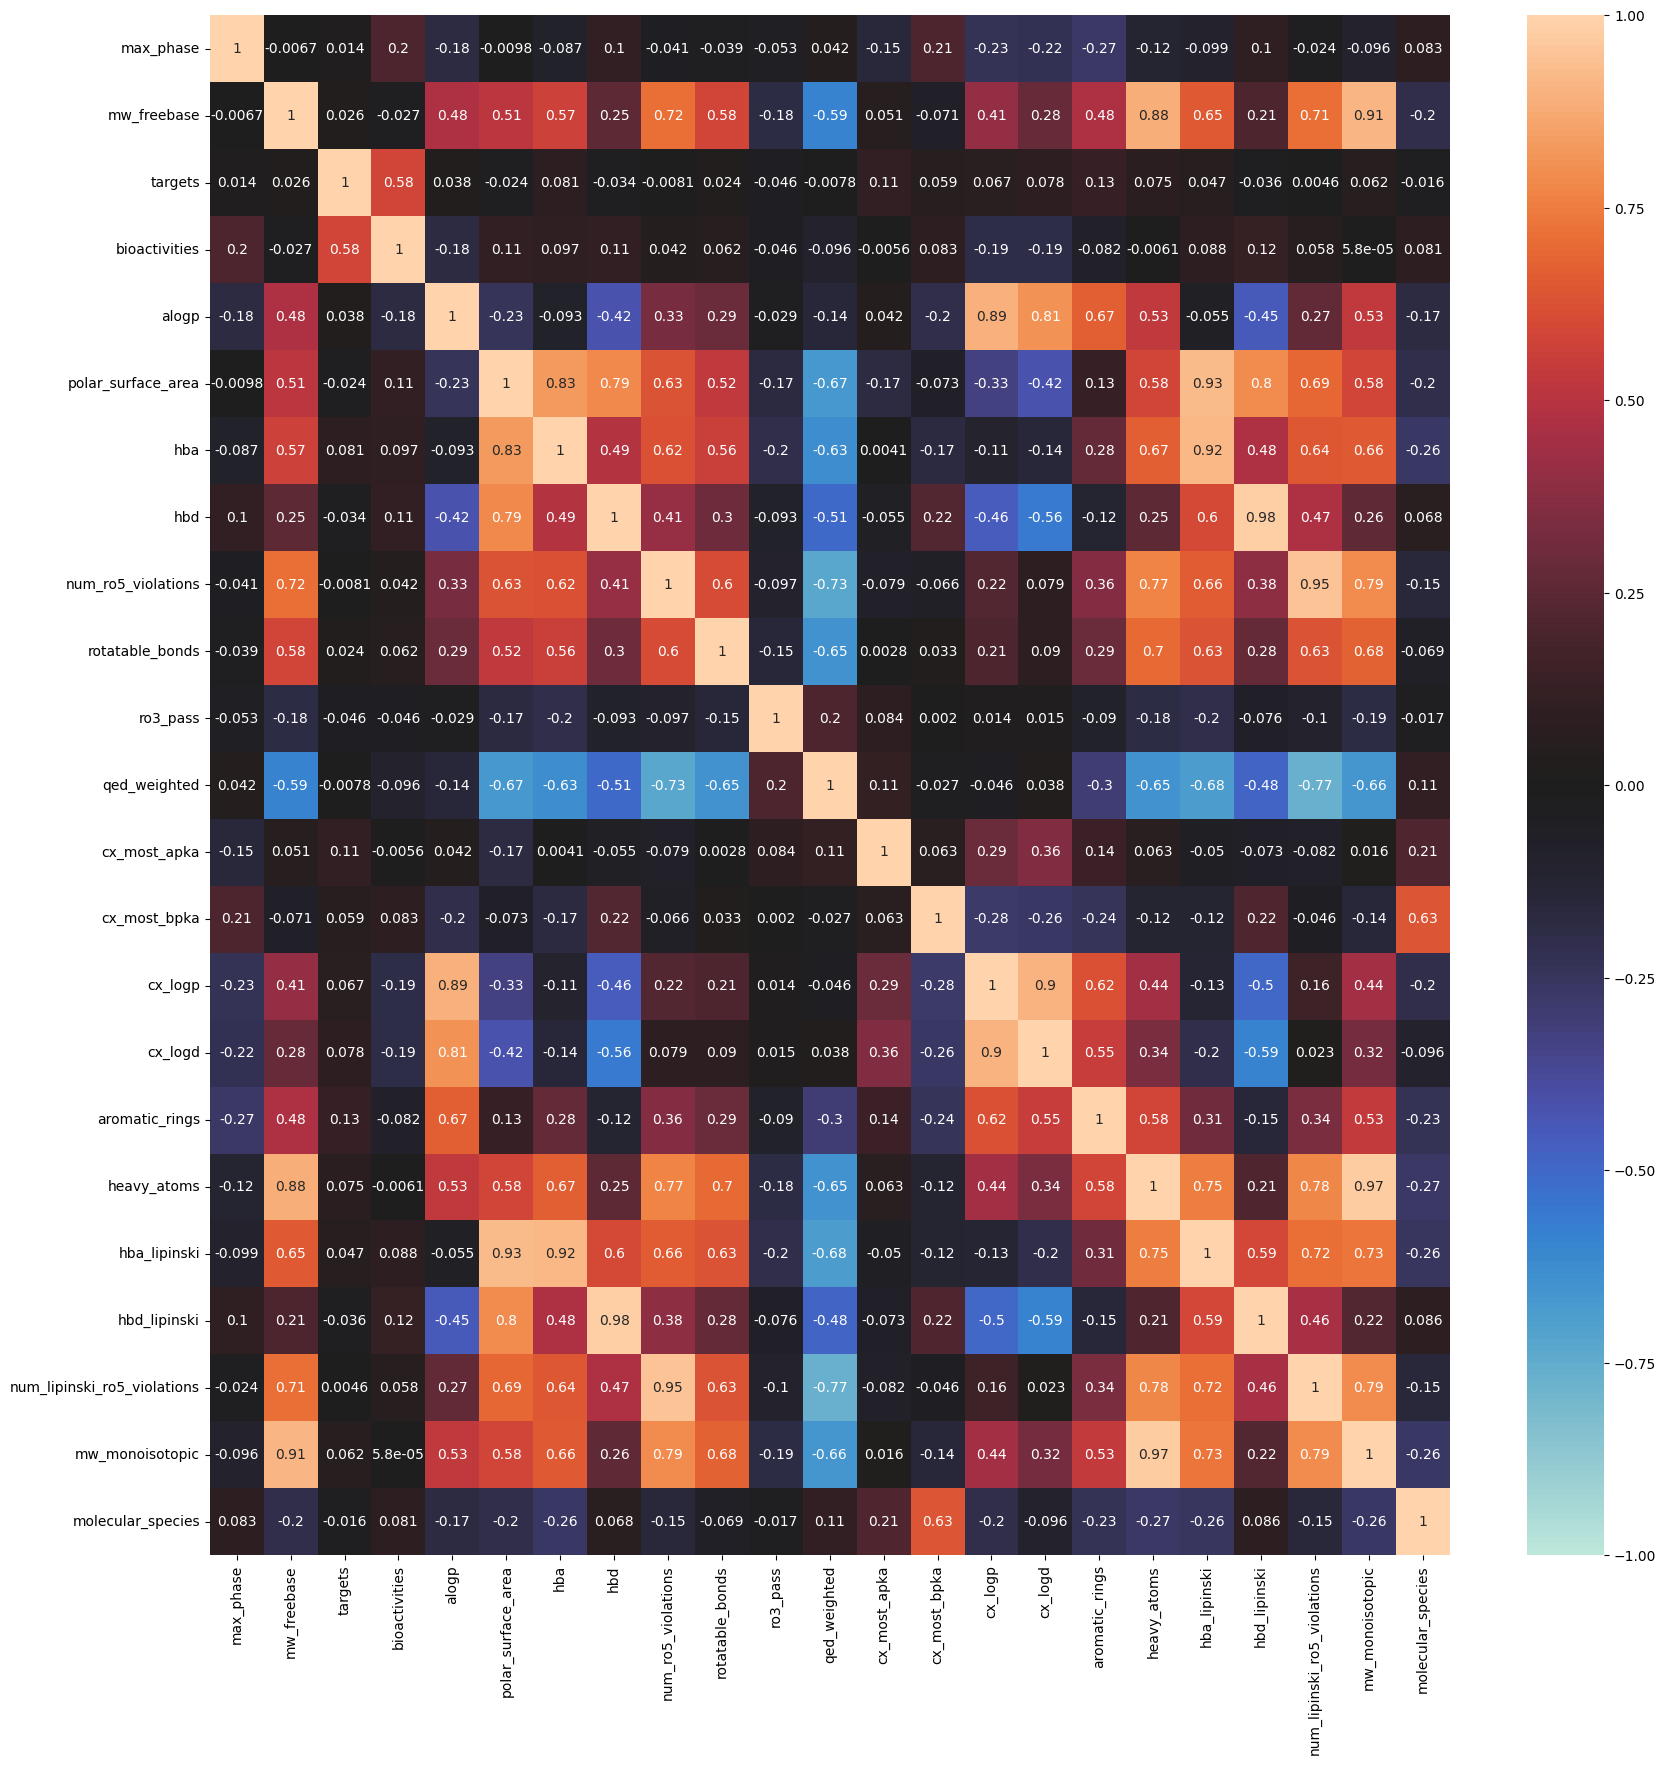

In [53]:
plt.figure(figsize = (20,20))
sns.heatmap((df).select_dtypes(include=['number']).corr(), annot = True, vmin=-1, vmax=1, center= 0)

<Axes: >

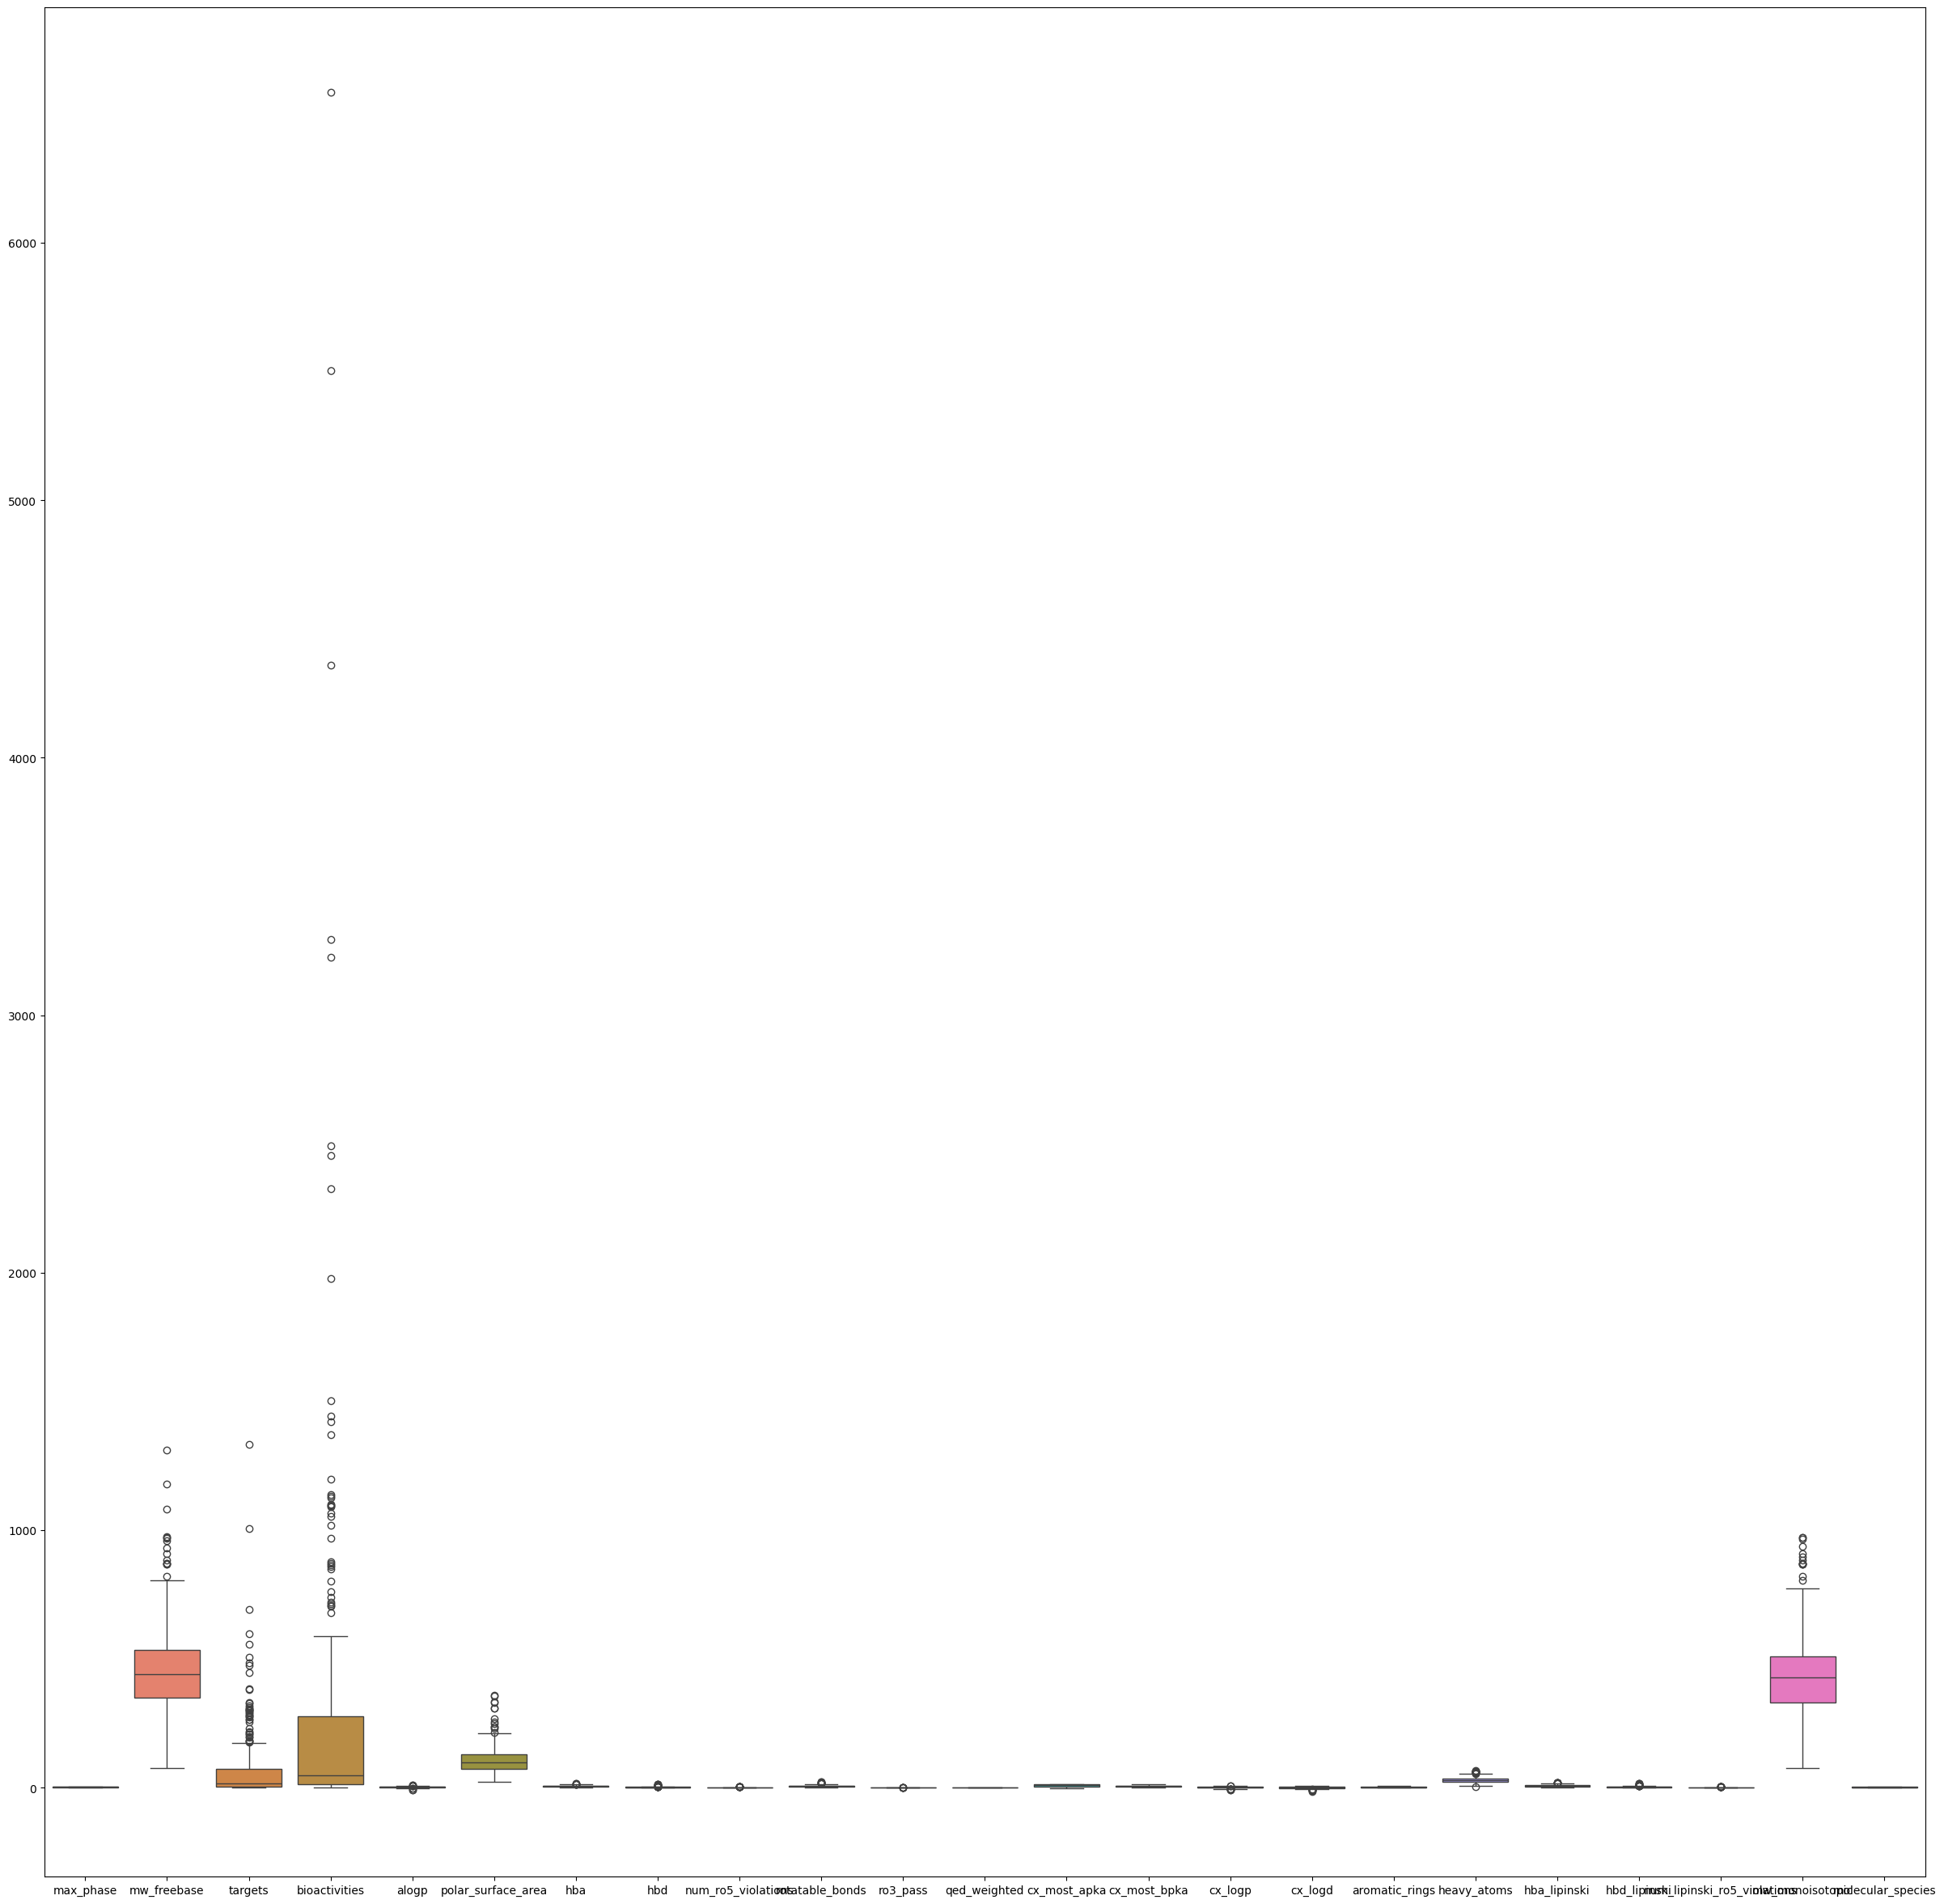

In [54]:
# не очень читабельно, но идея понятна
plt.figure(figsize=(30,30))
sns.boxplot(data=df.select_dtypes(include=['number']))

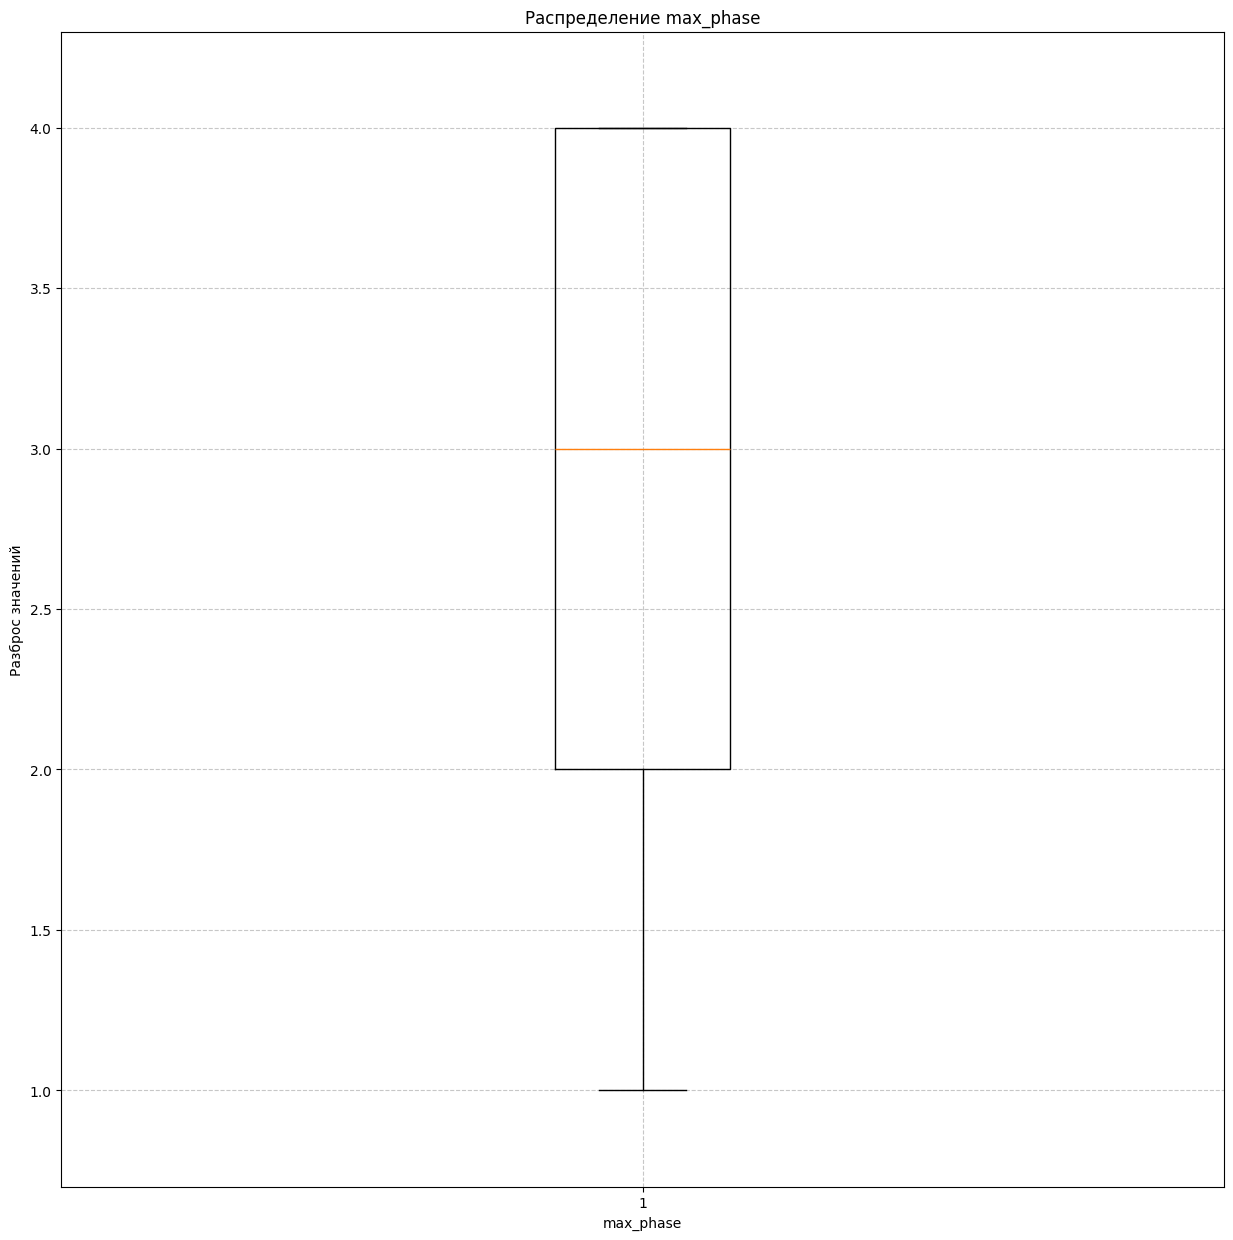

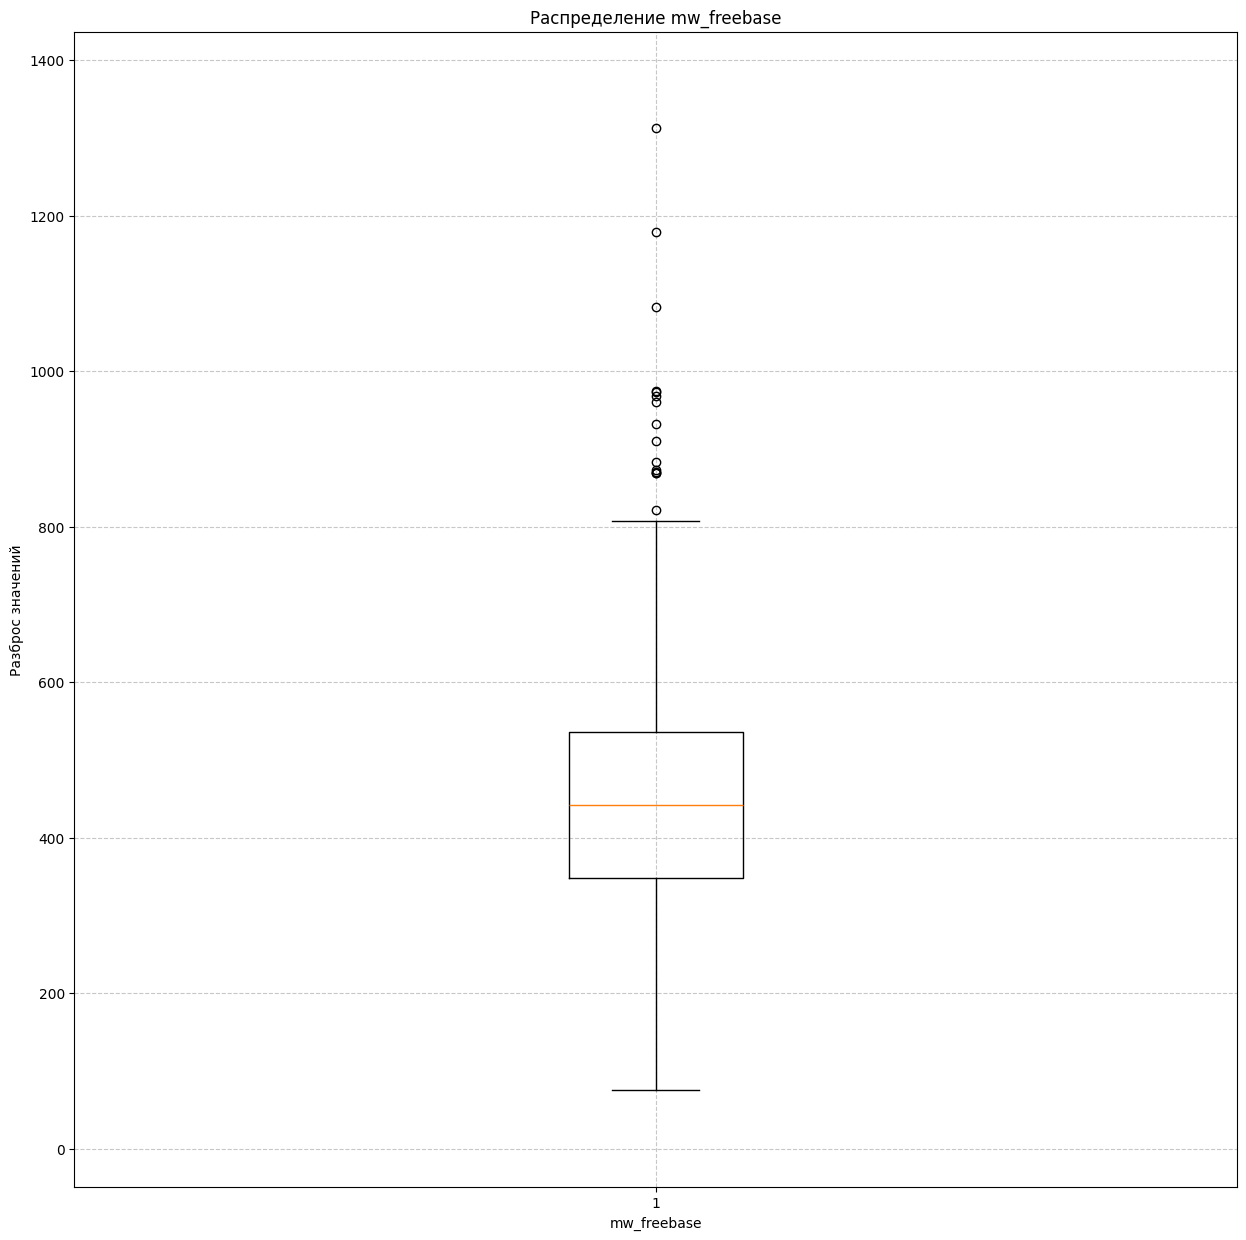

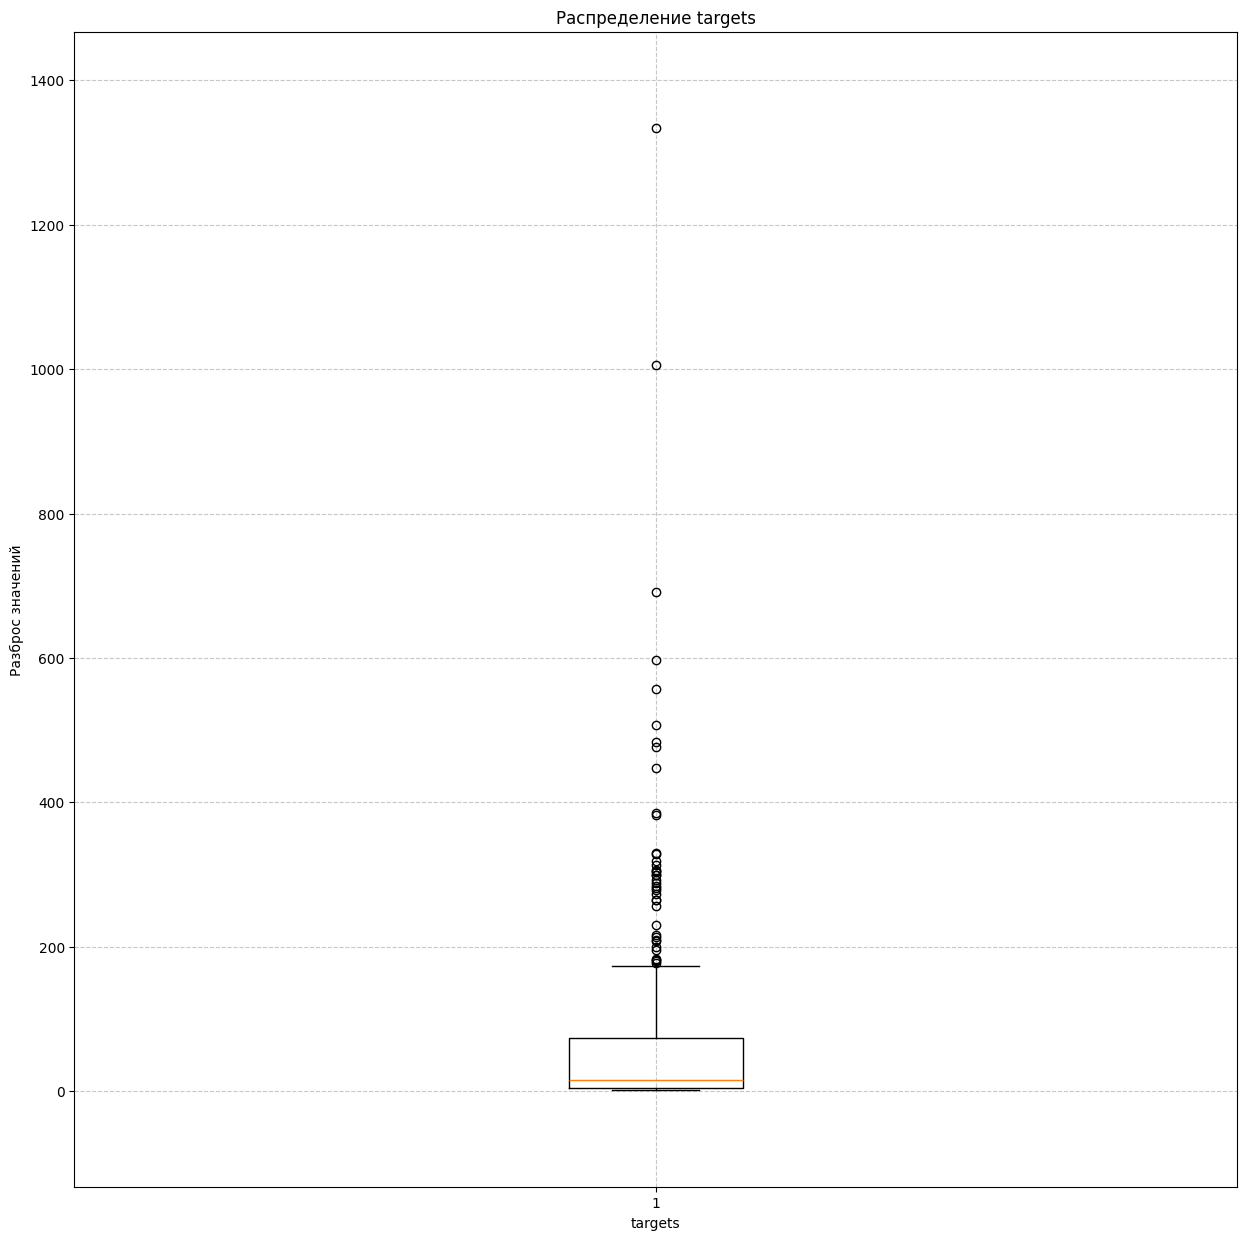

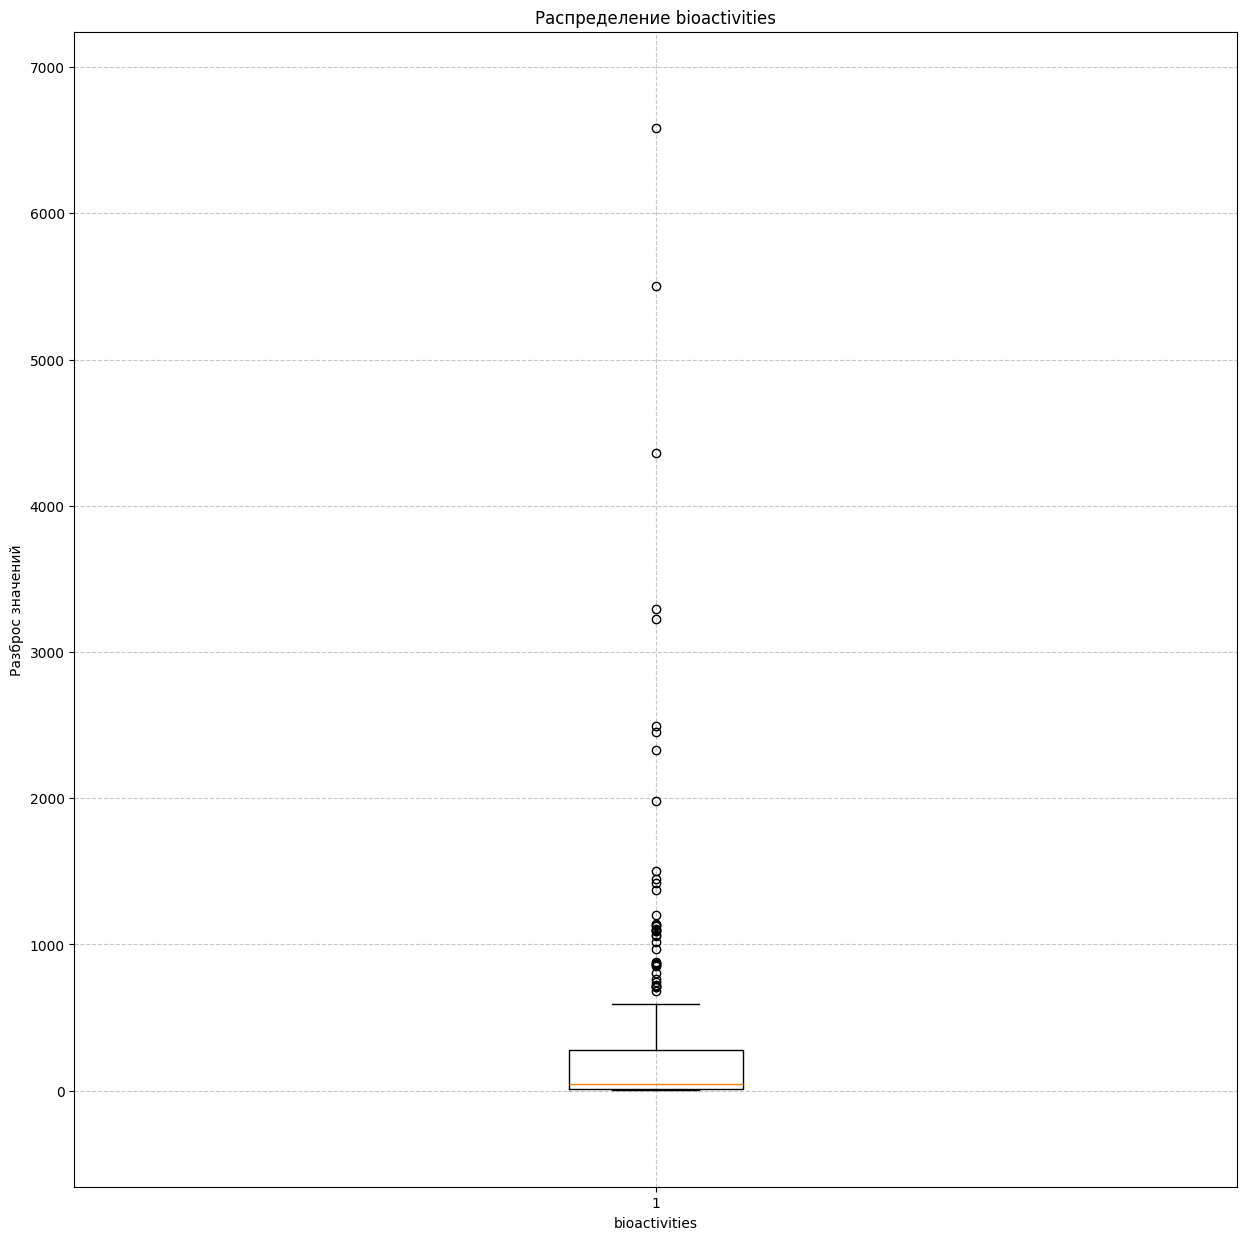

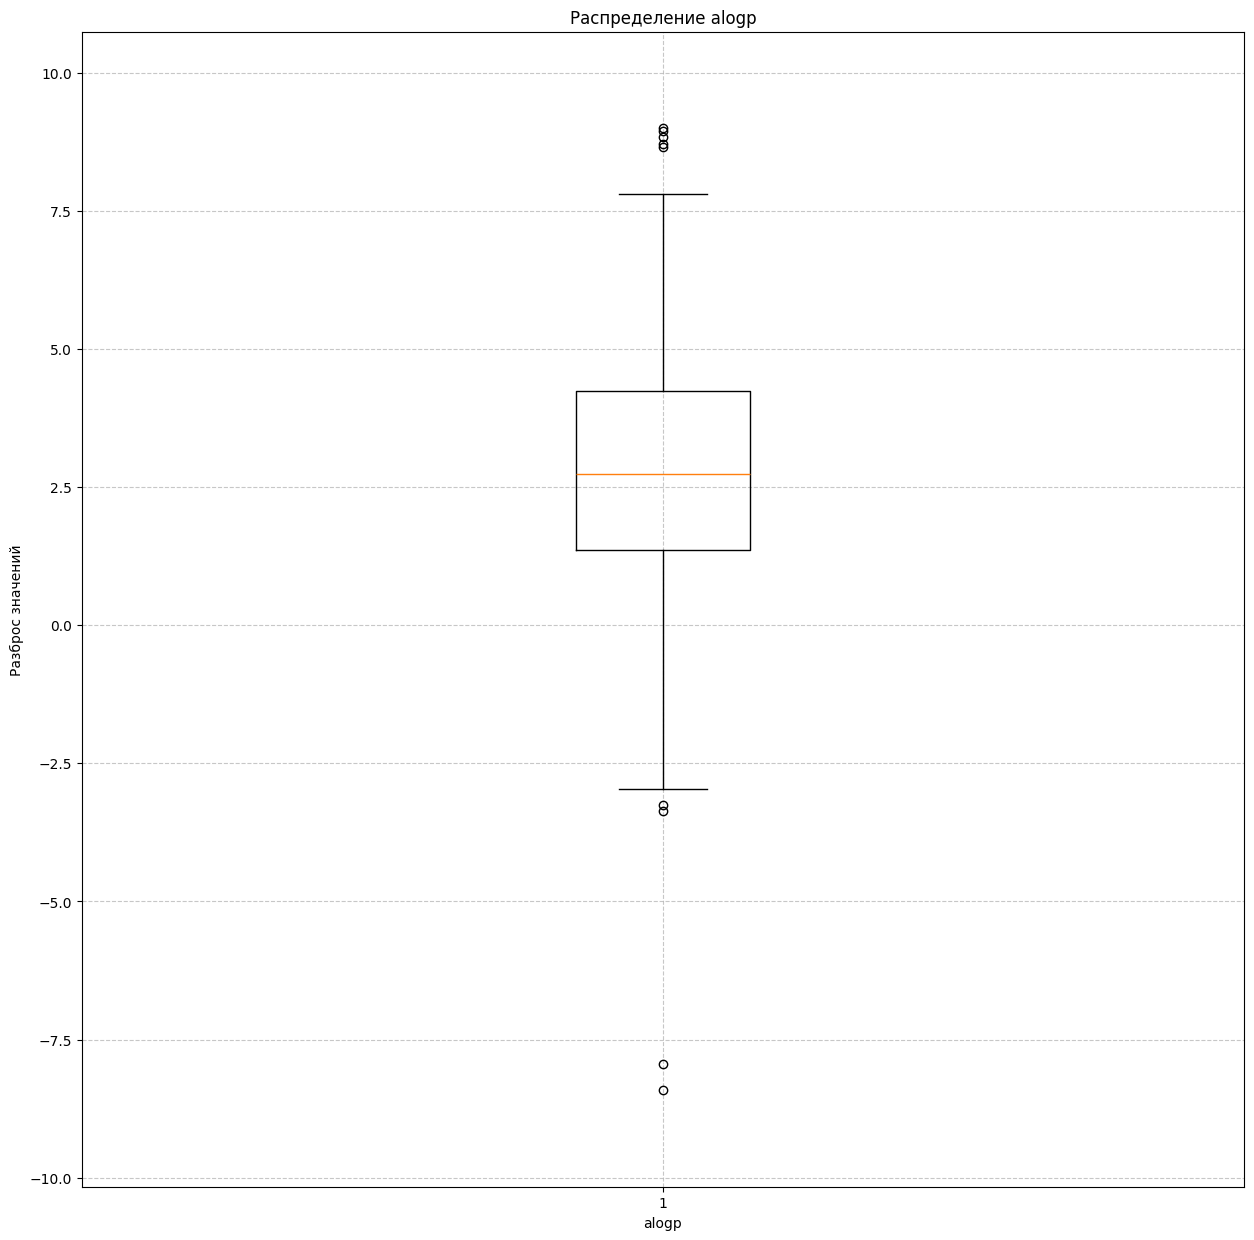

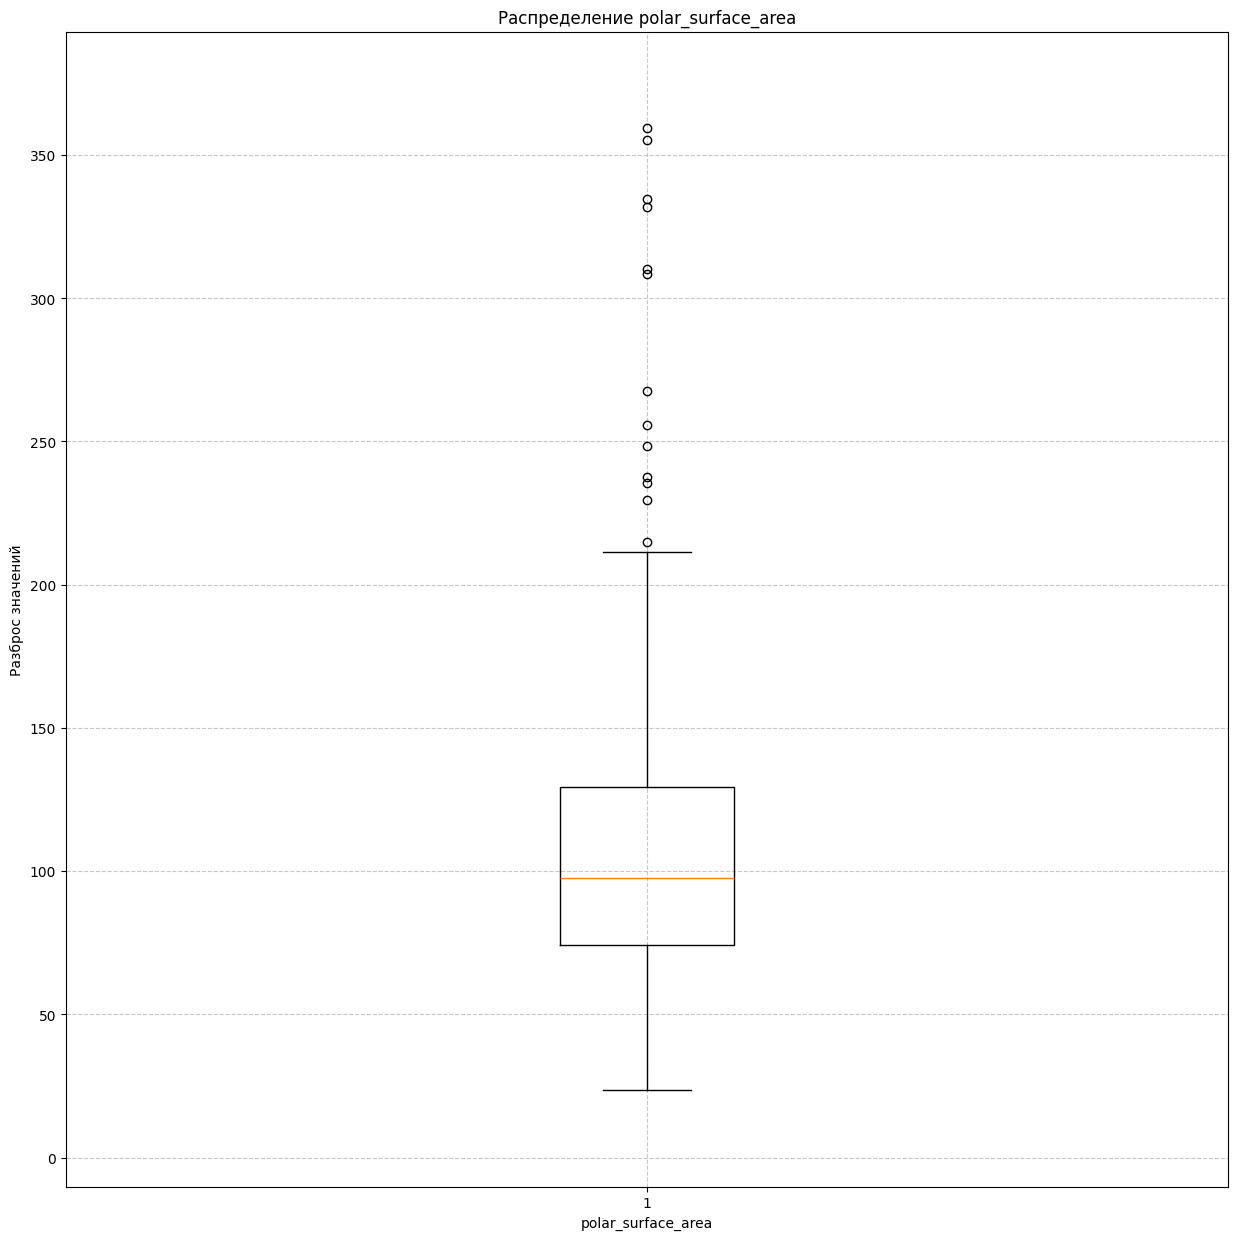

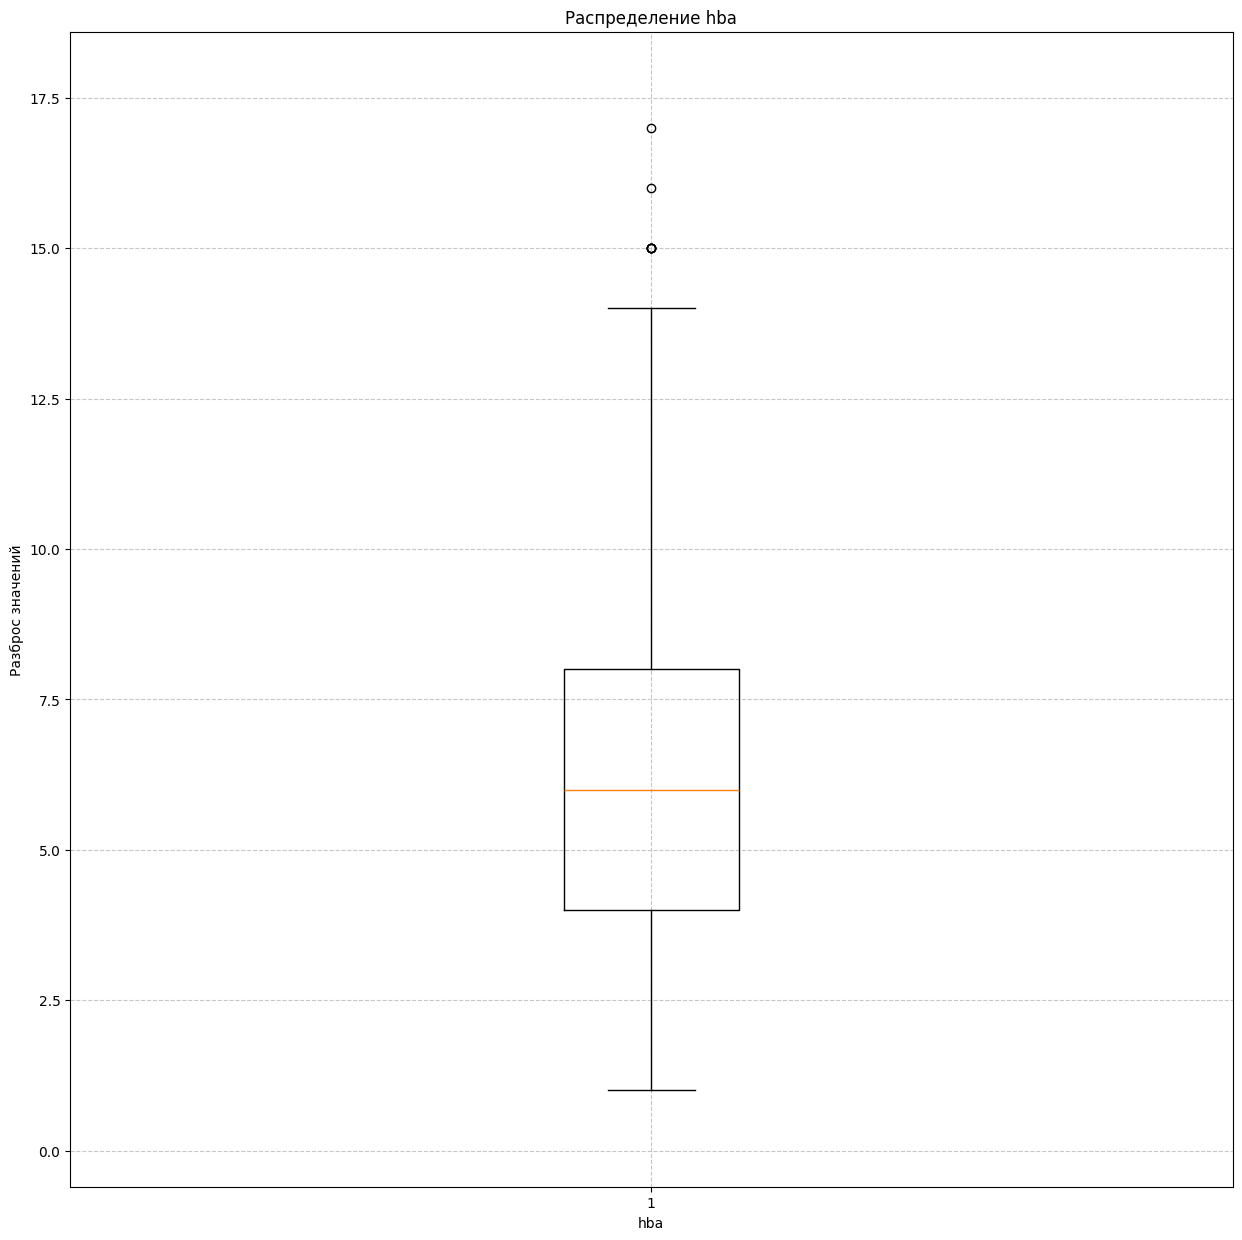

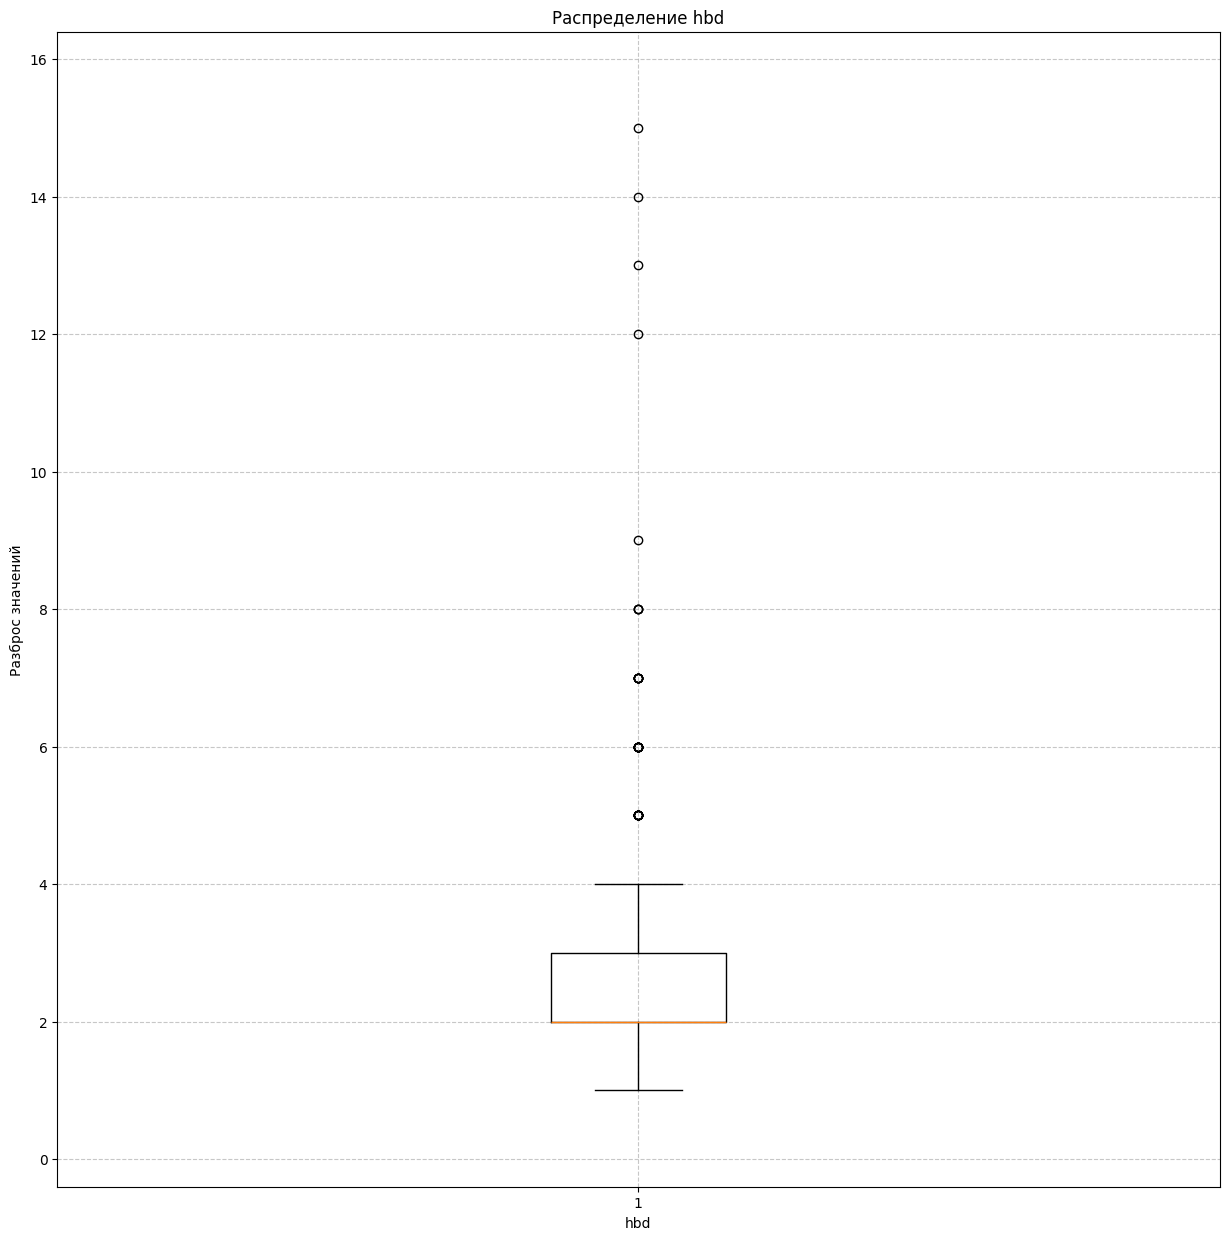

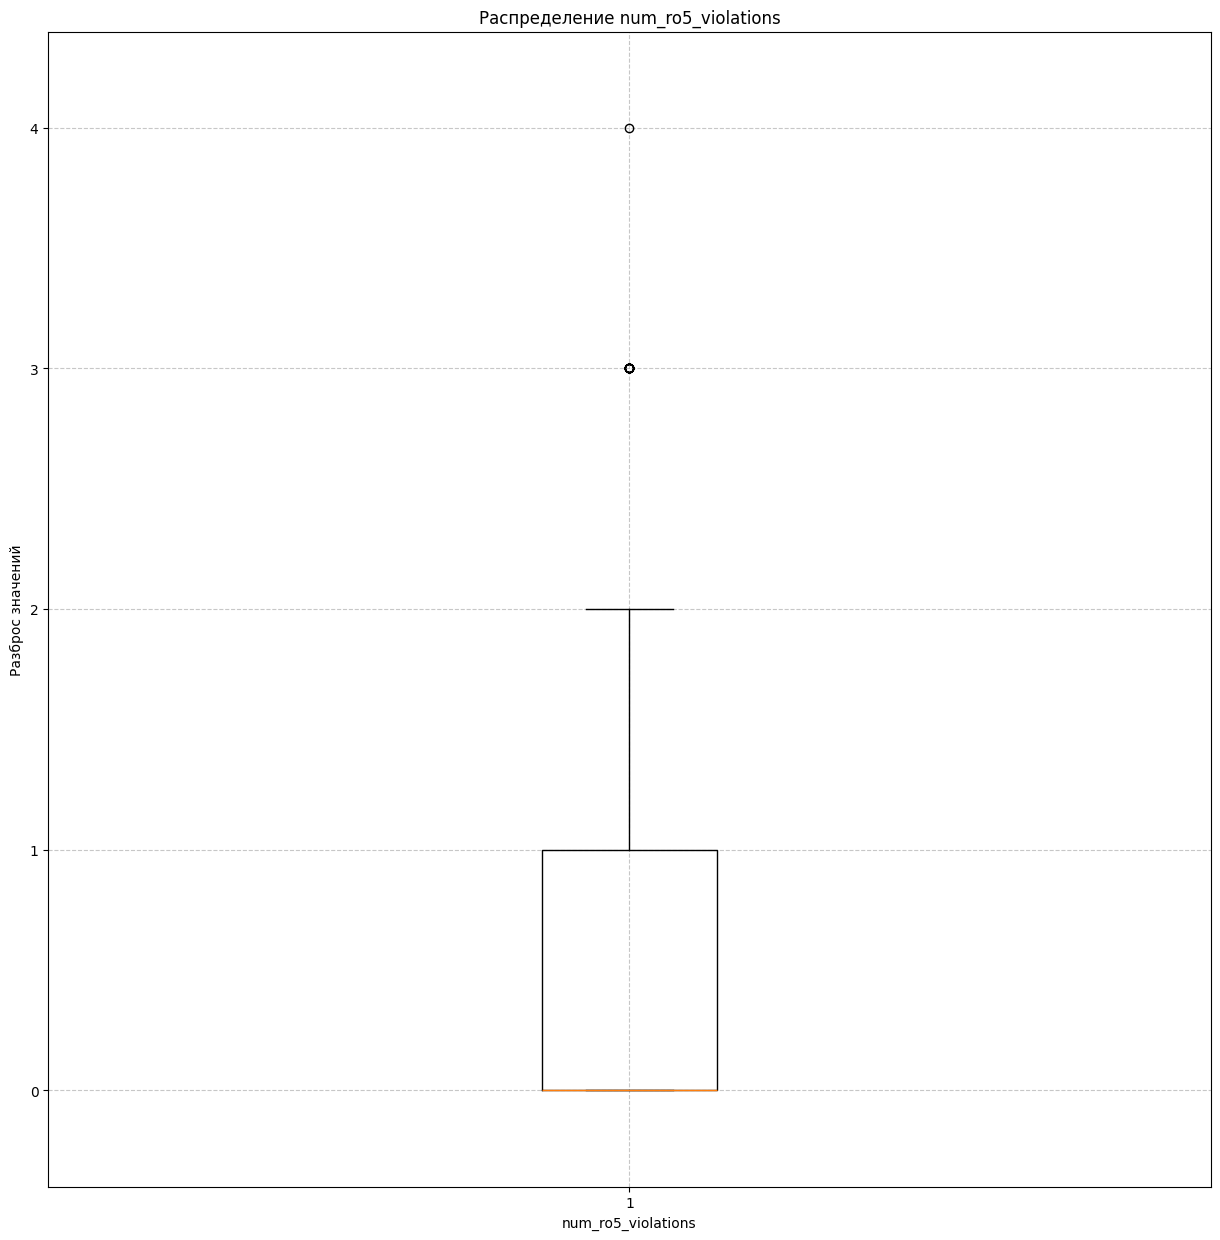

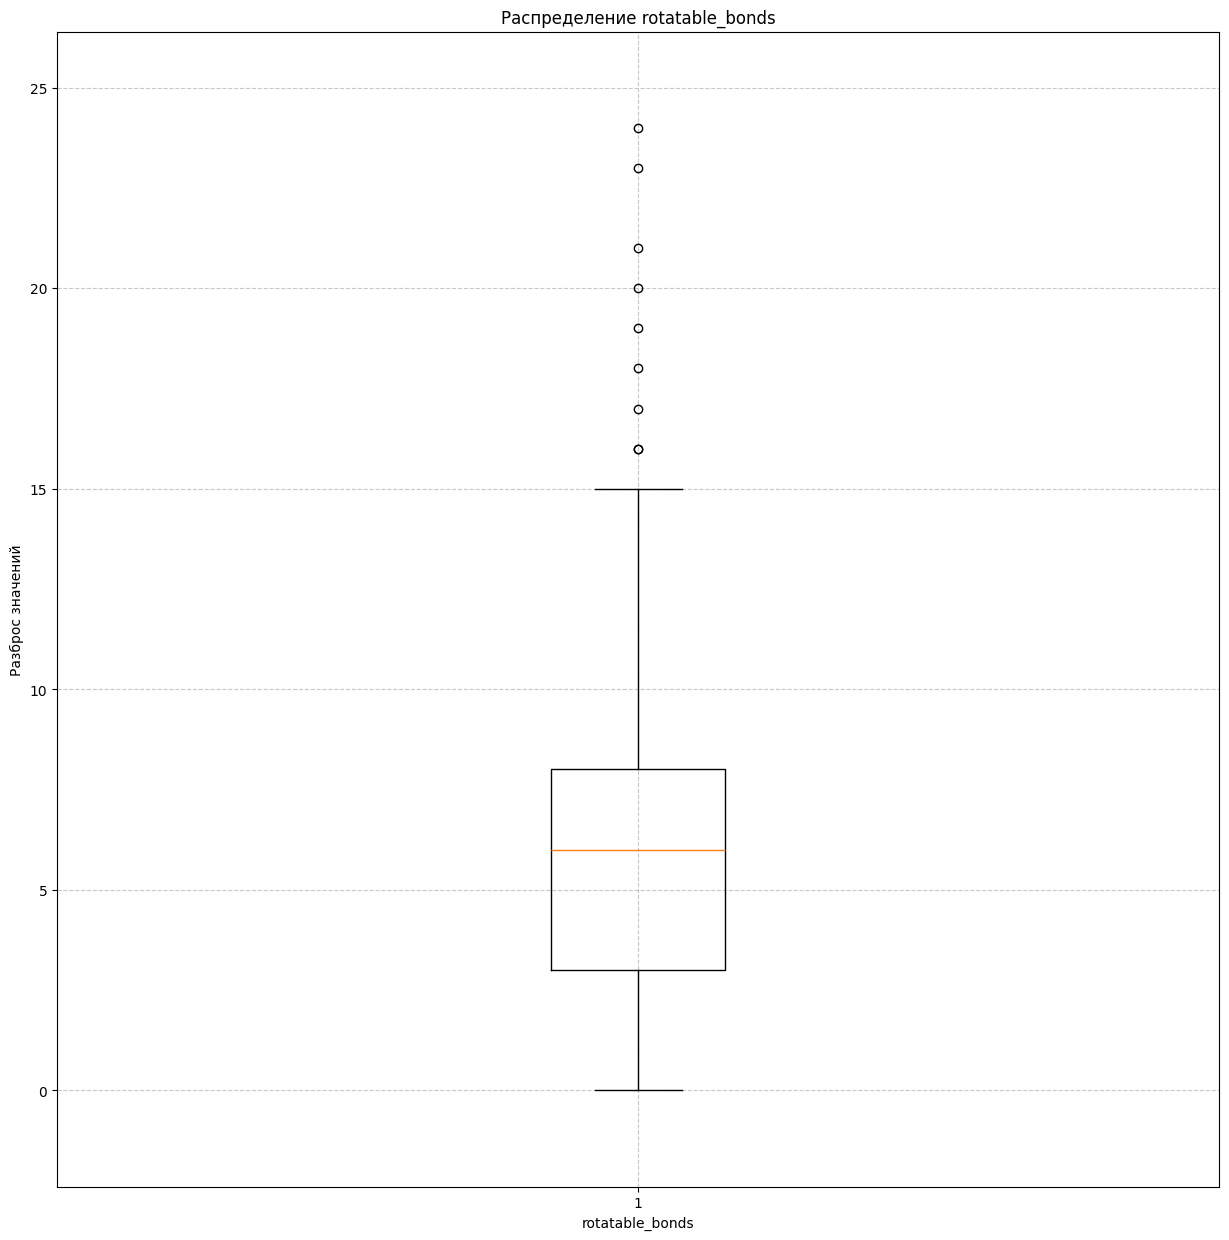

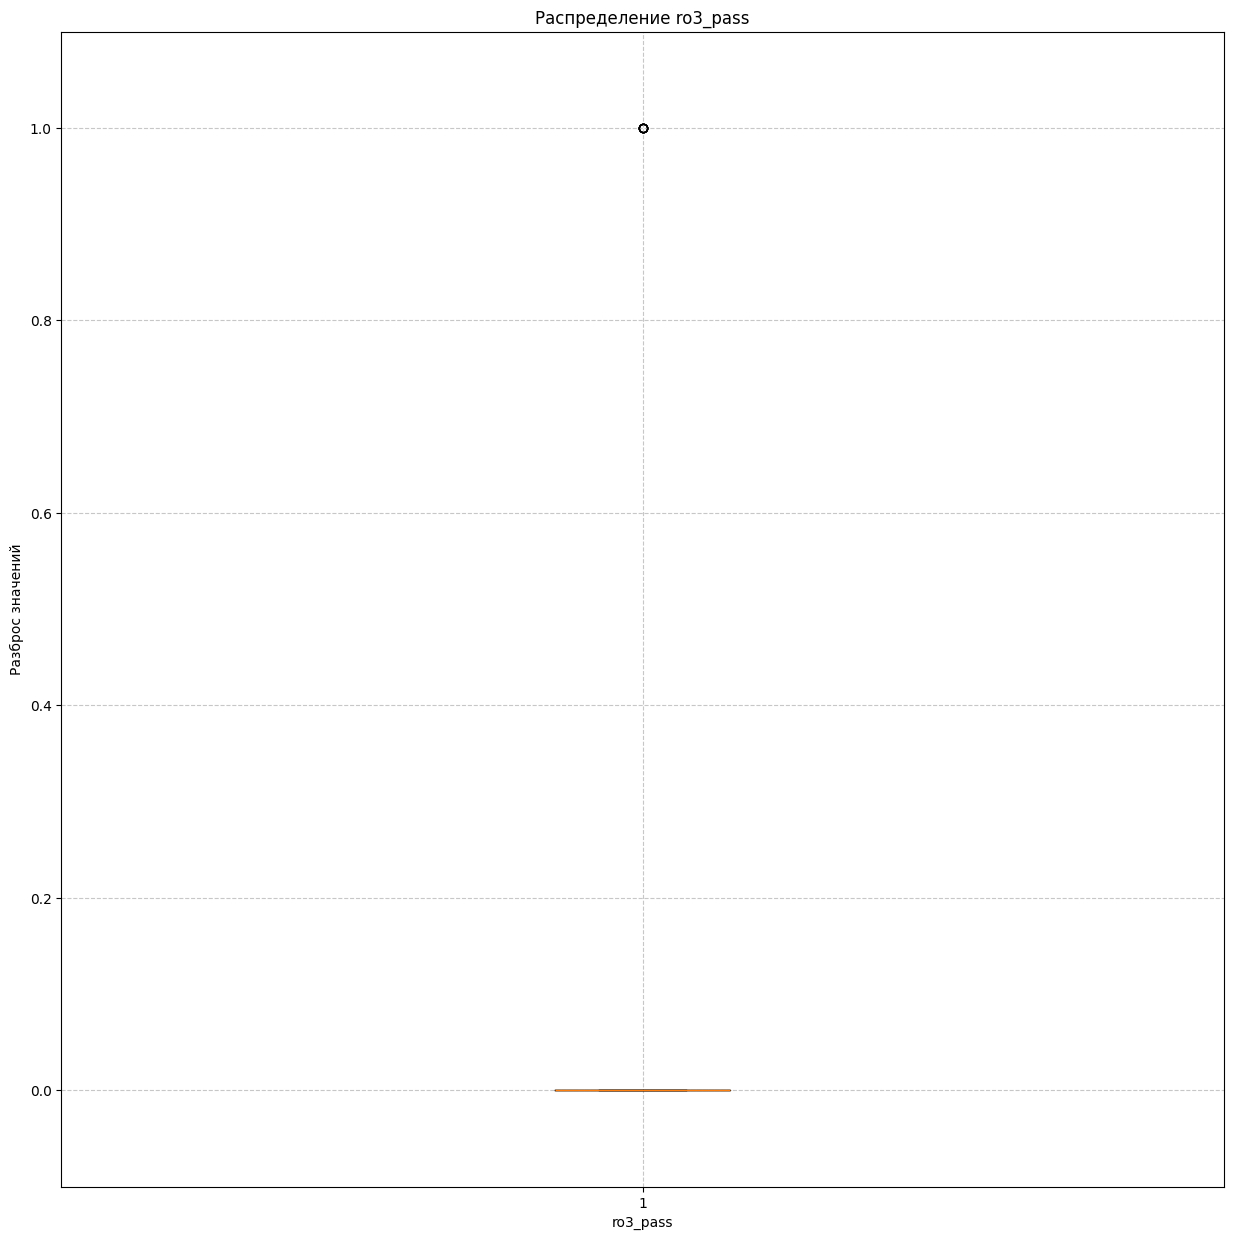

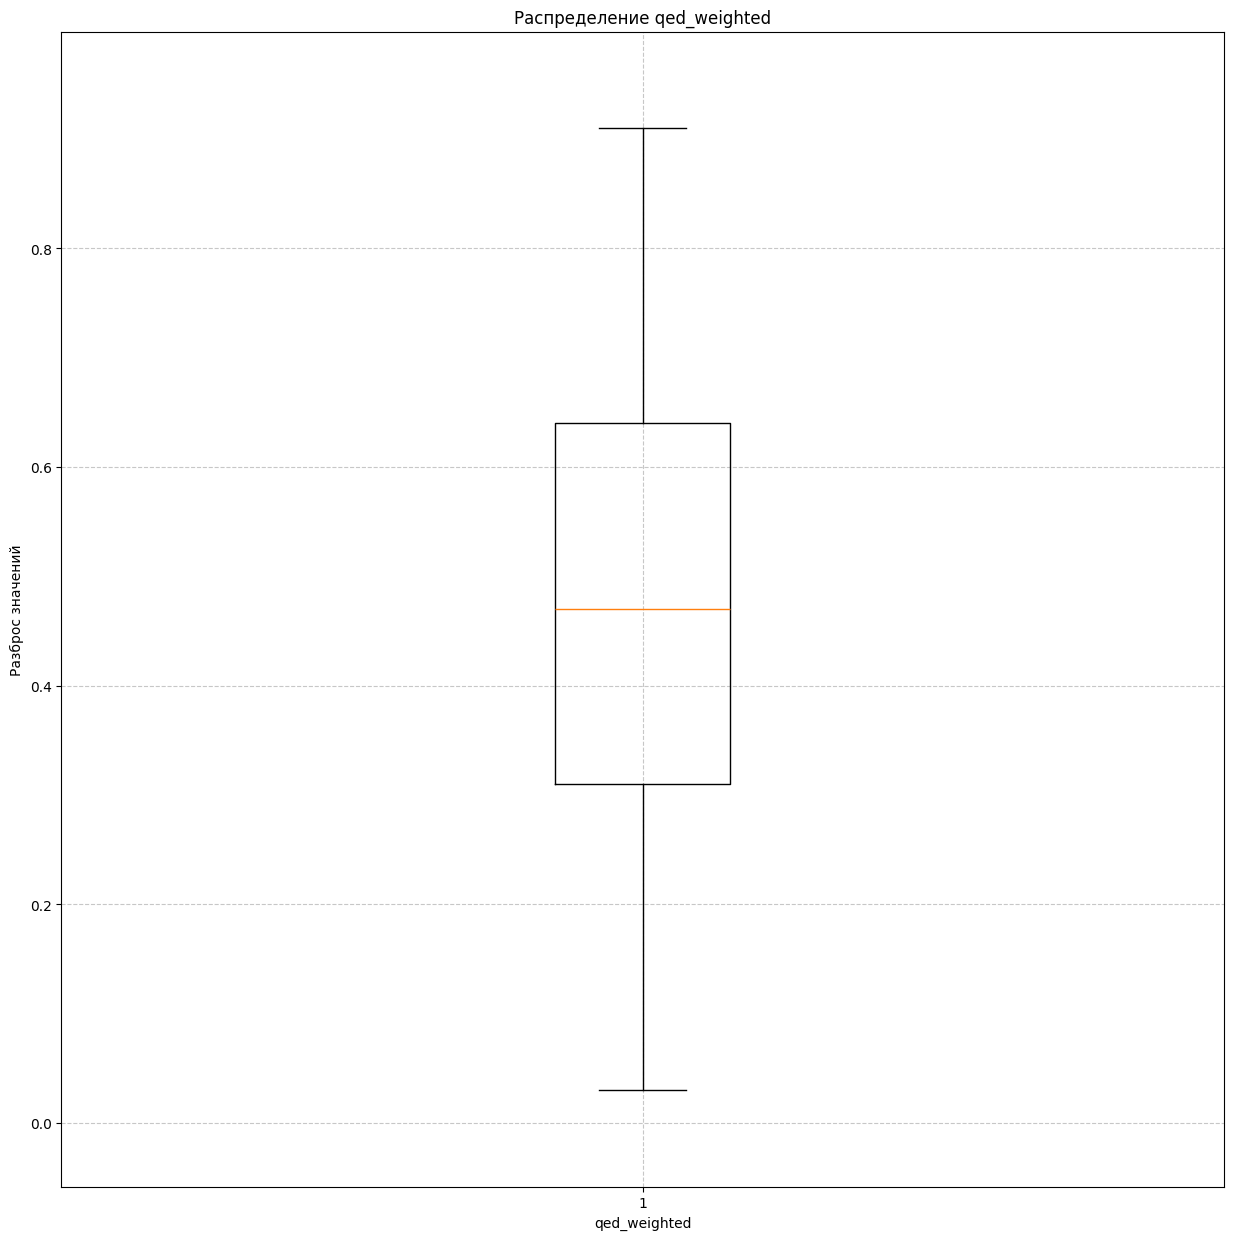

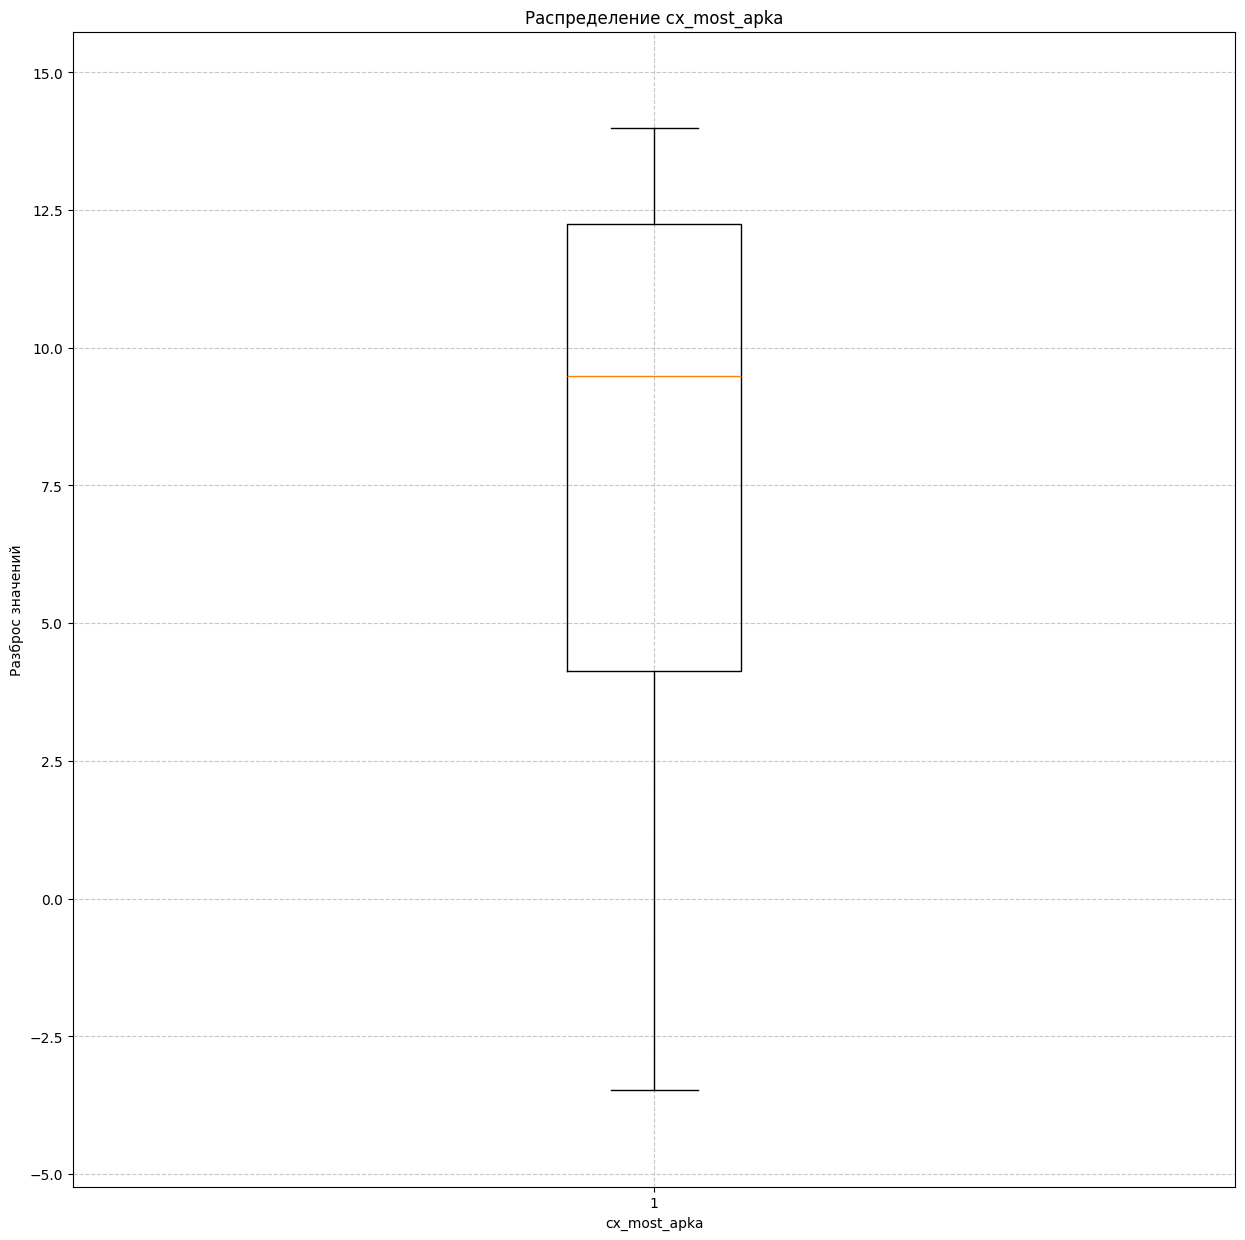

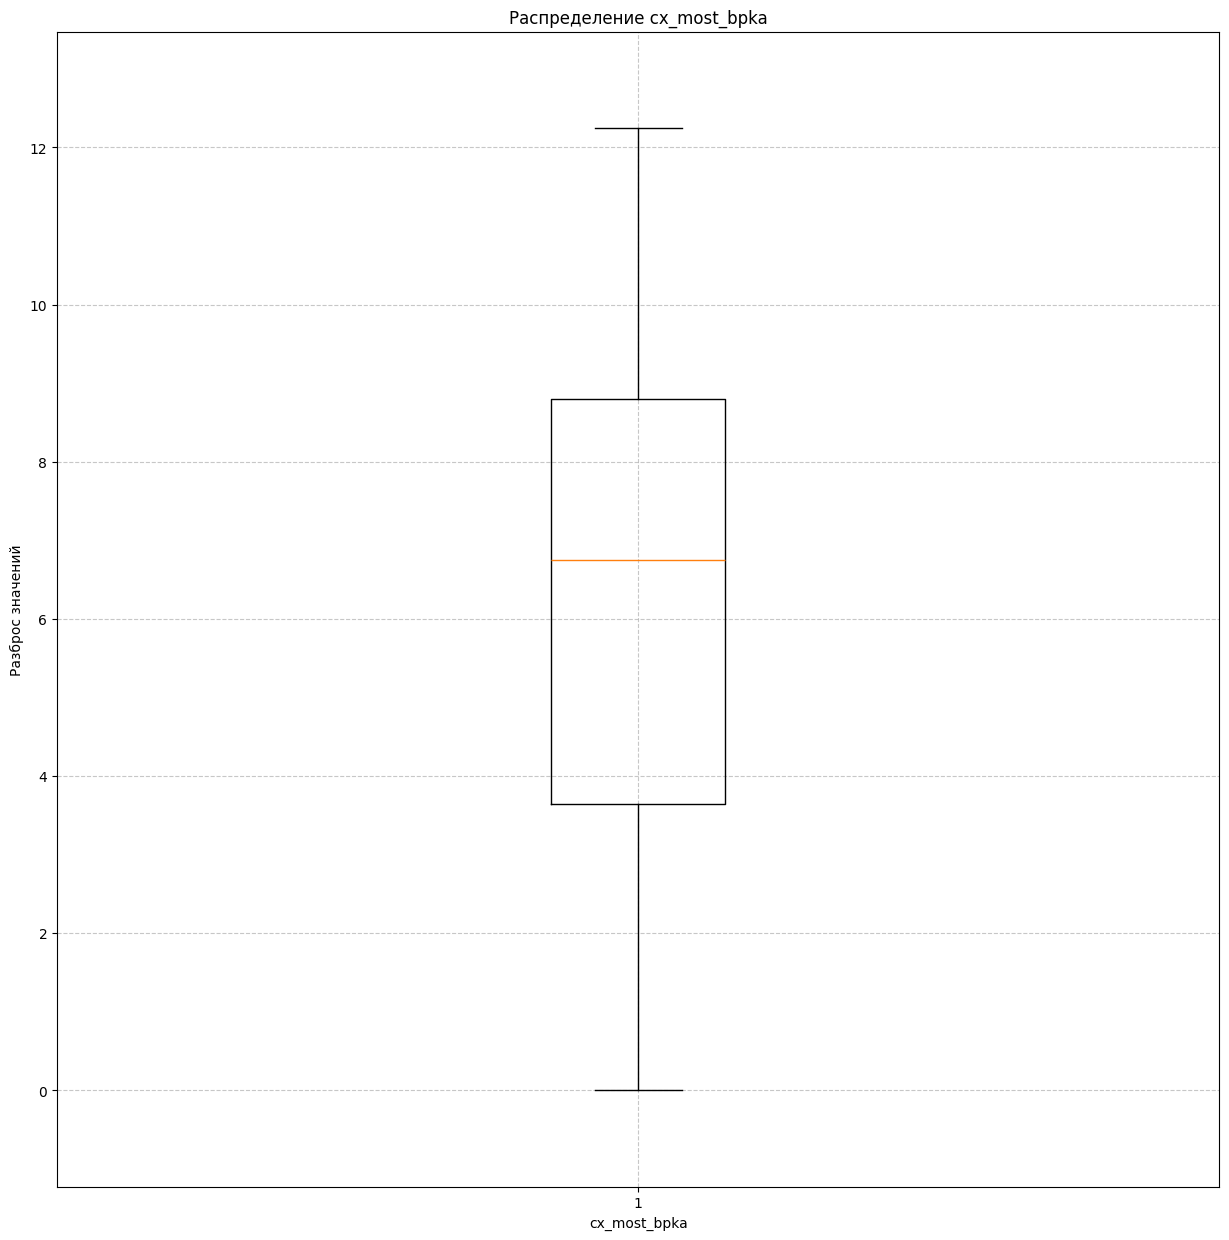

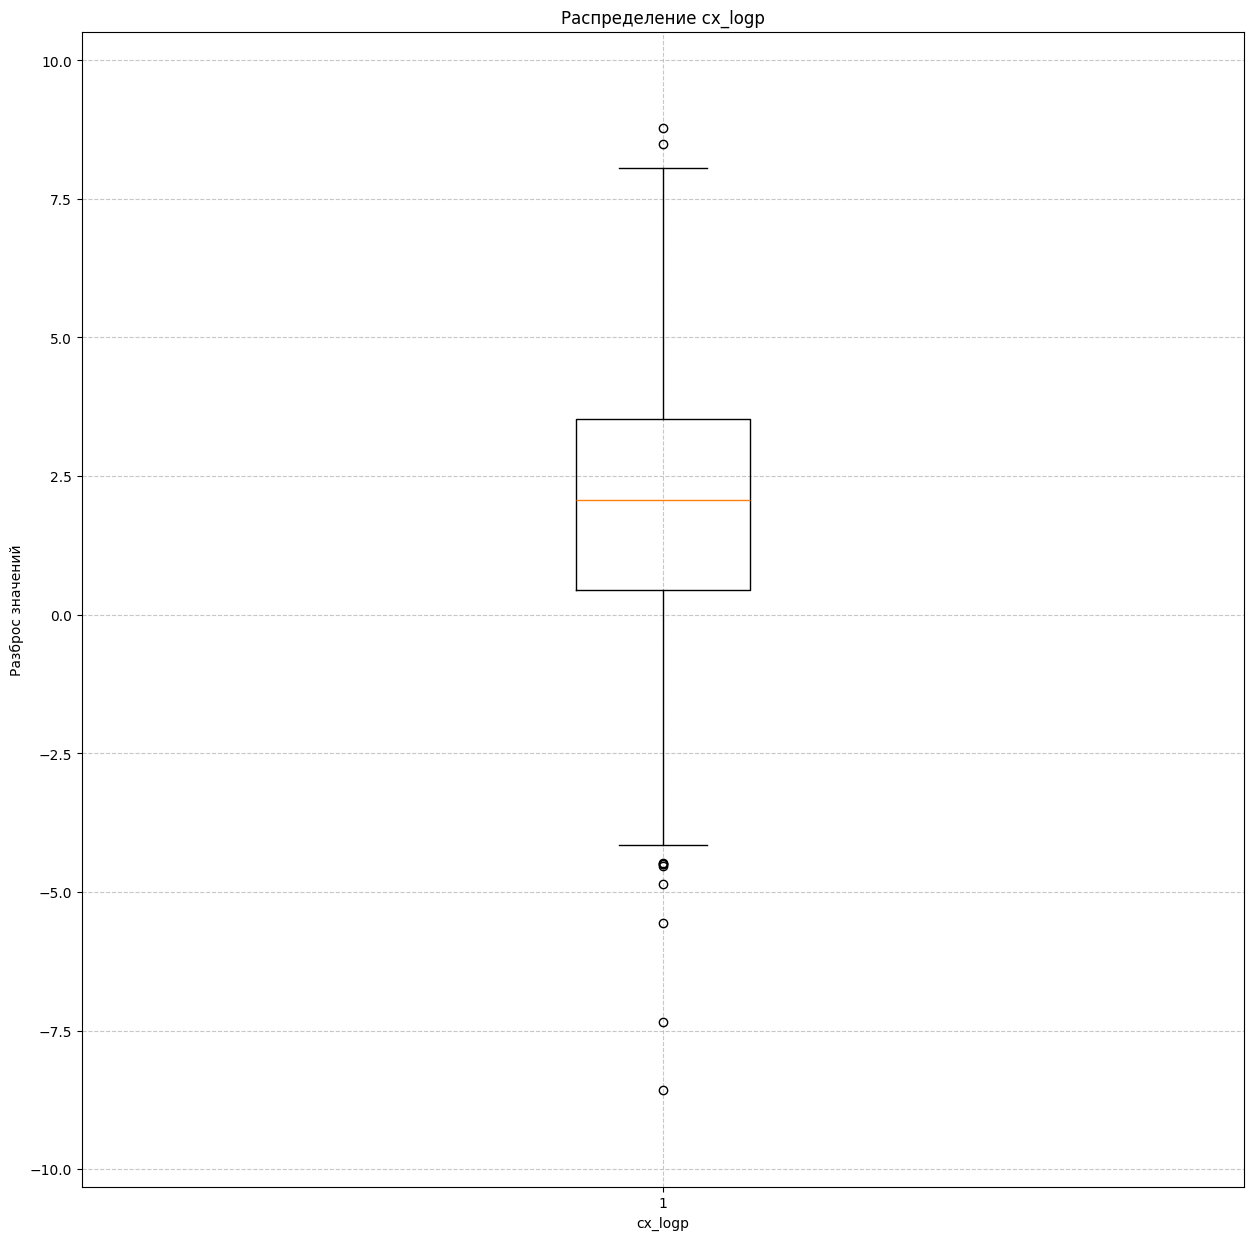

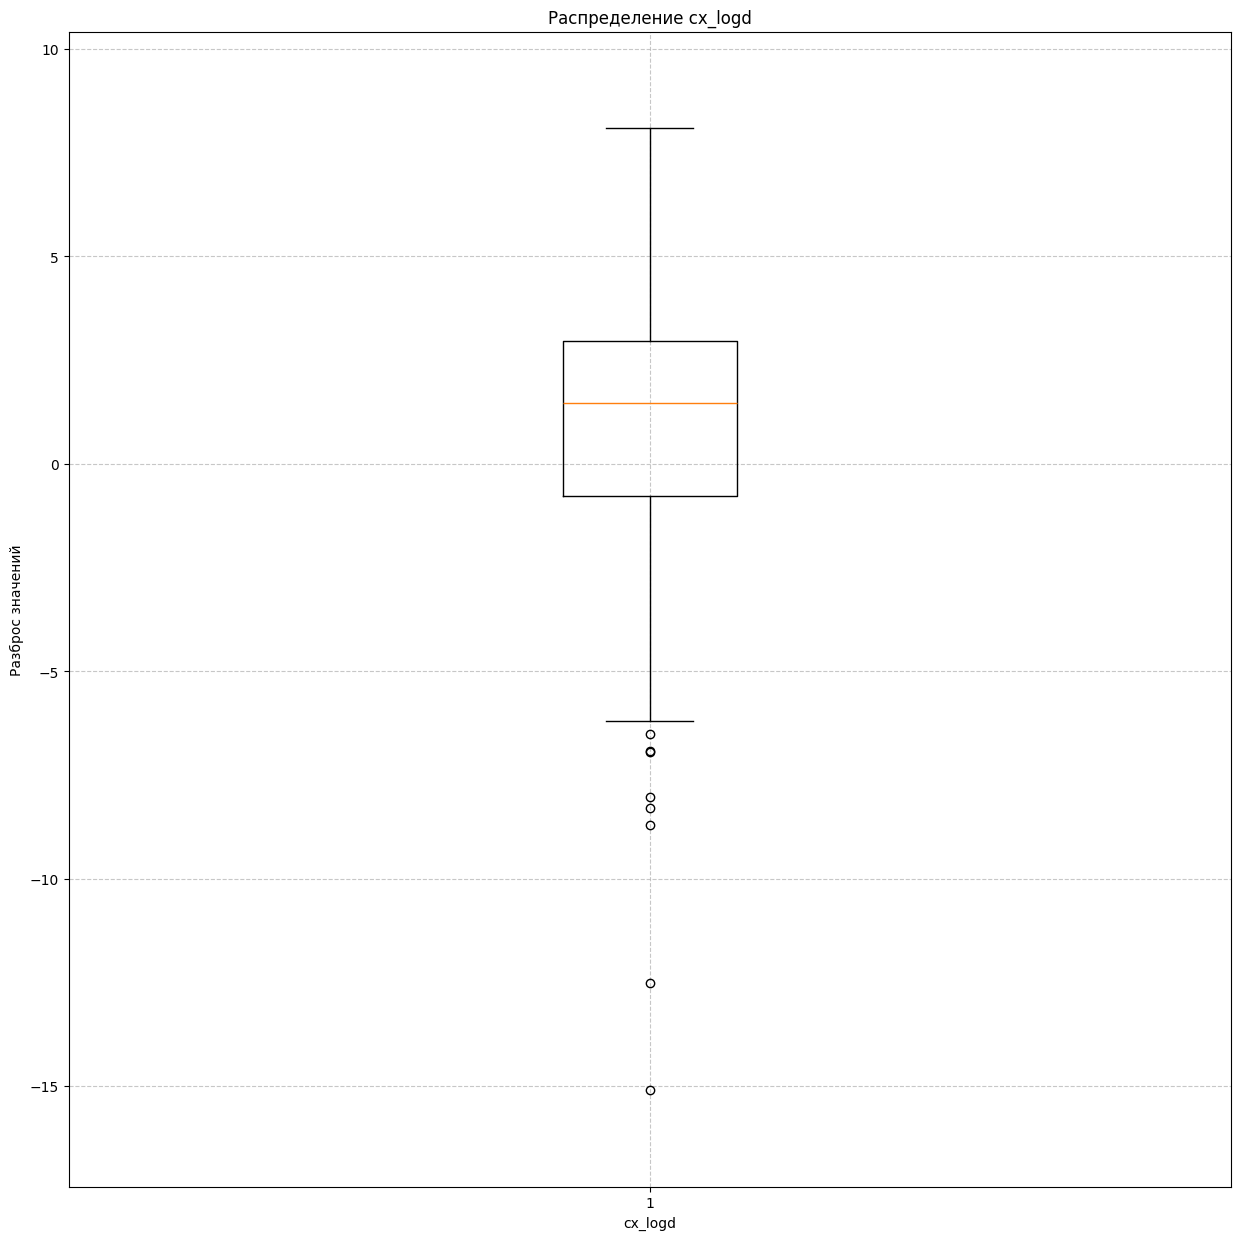

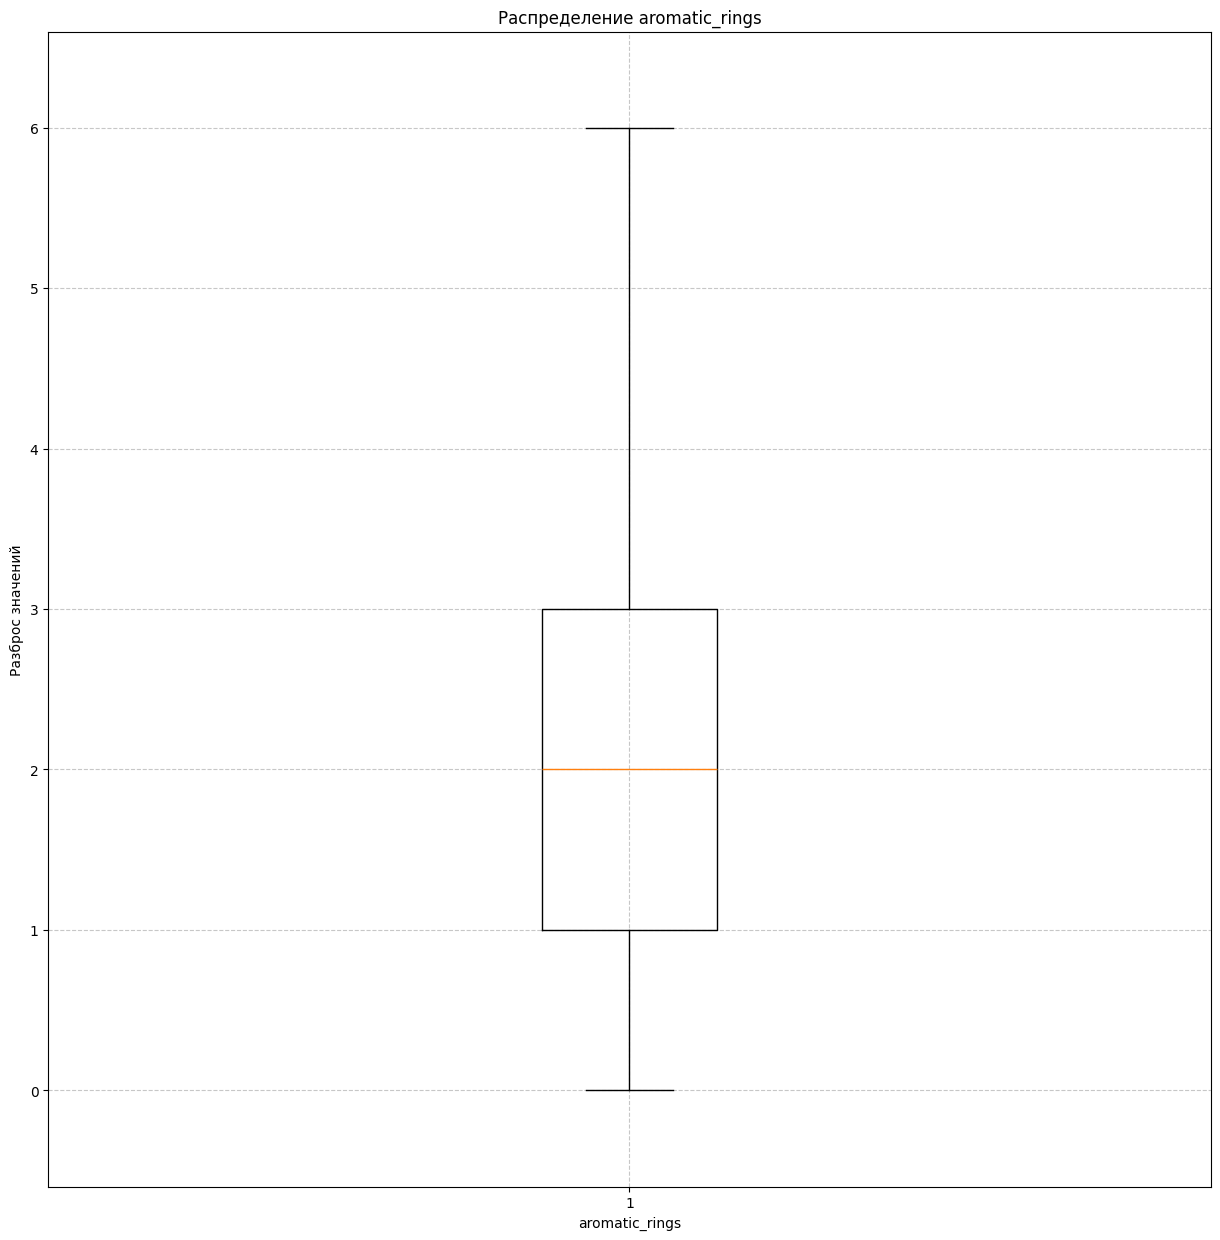

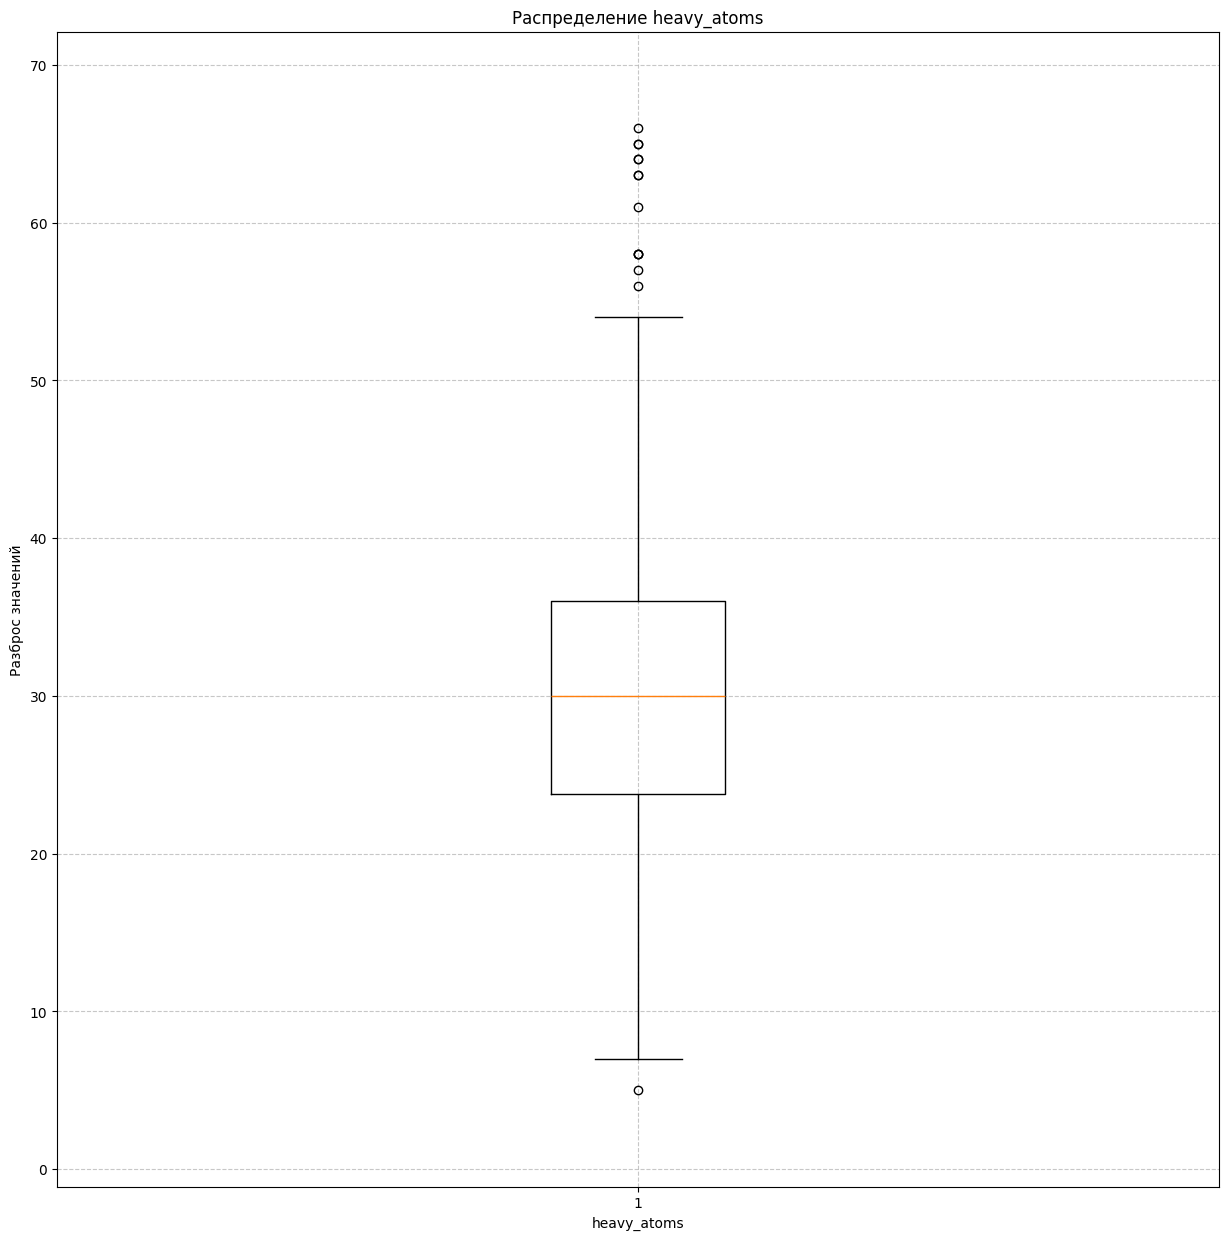

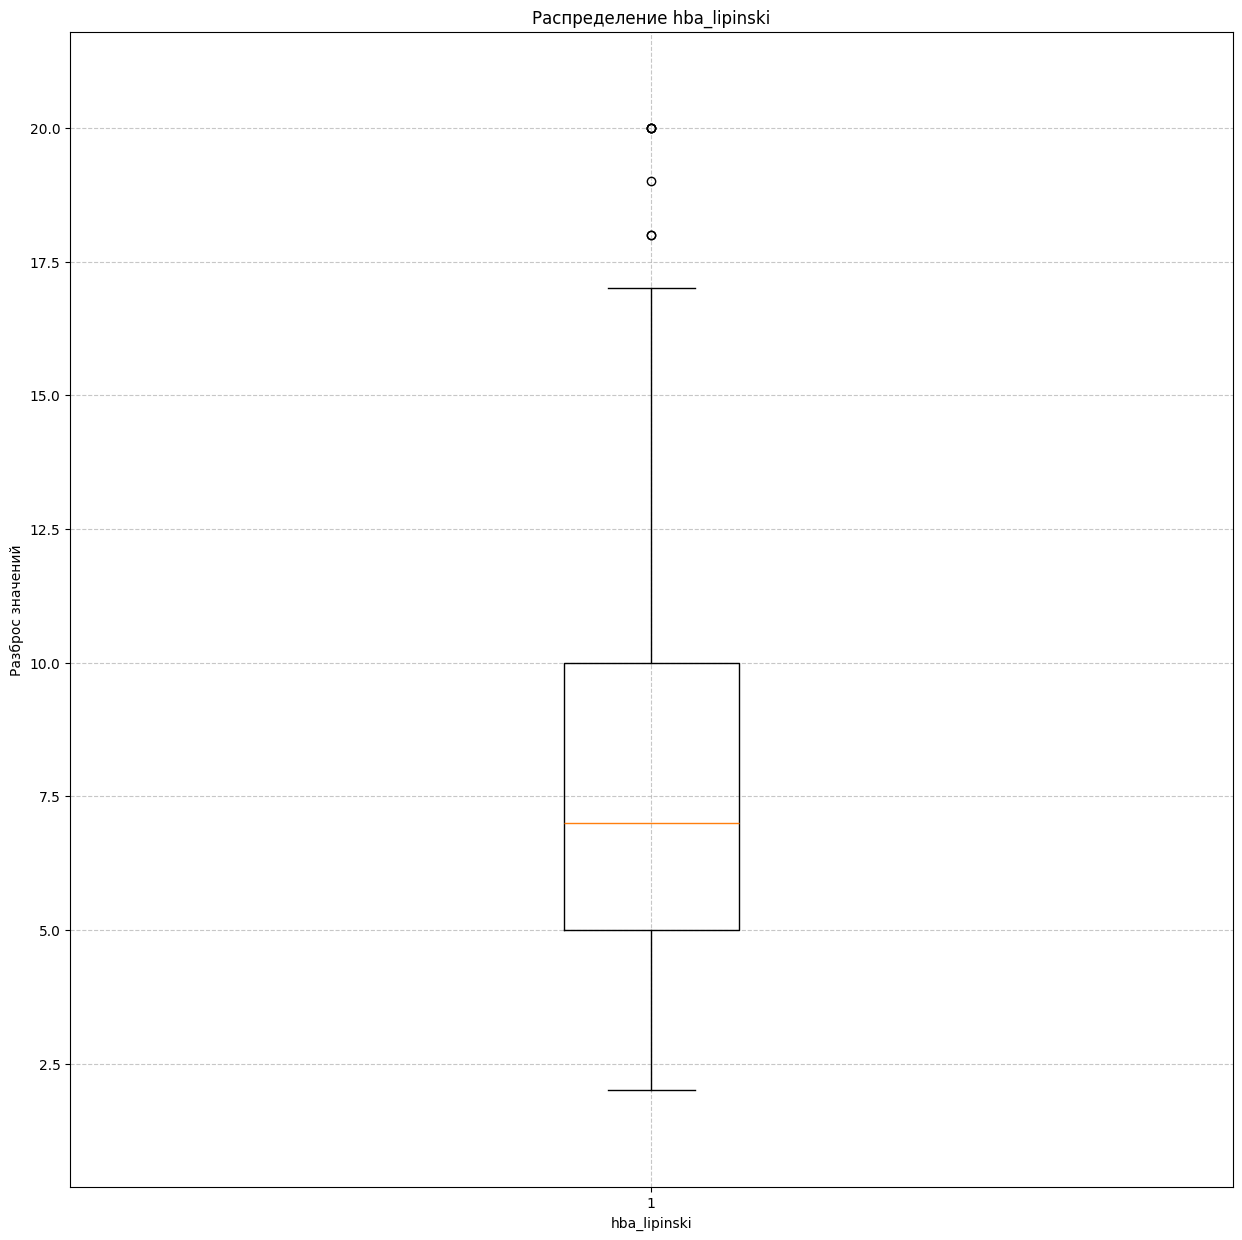

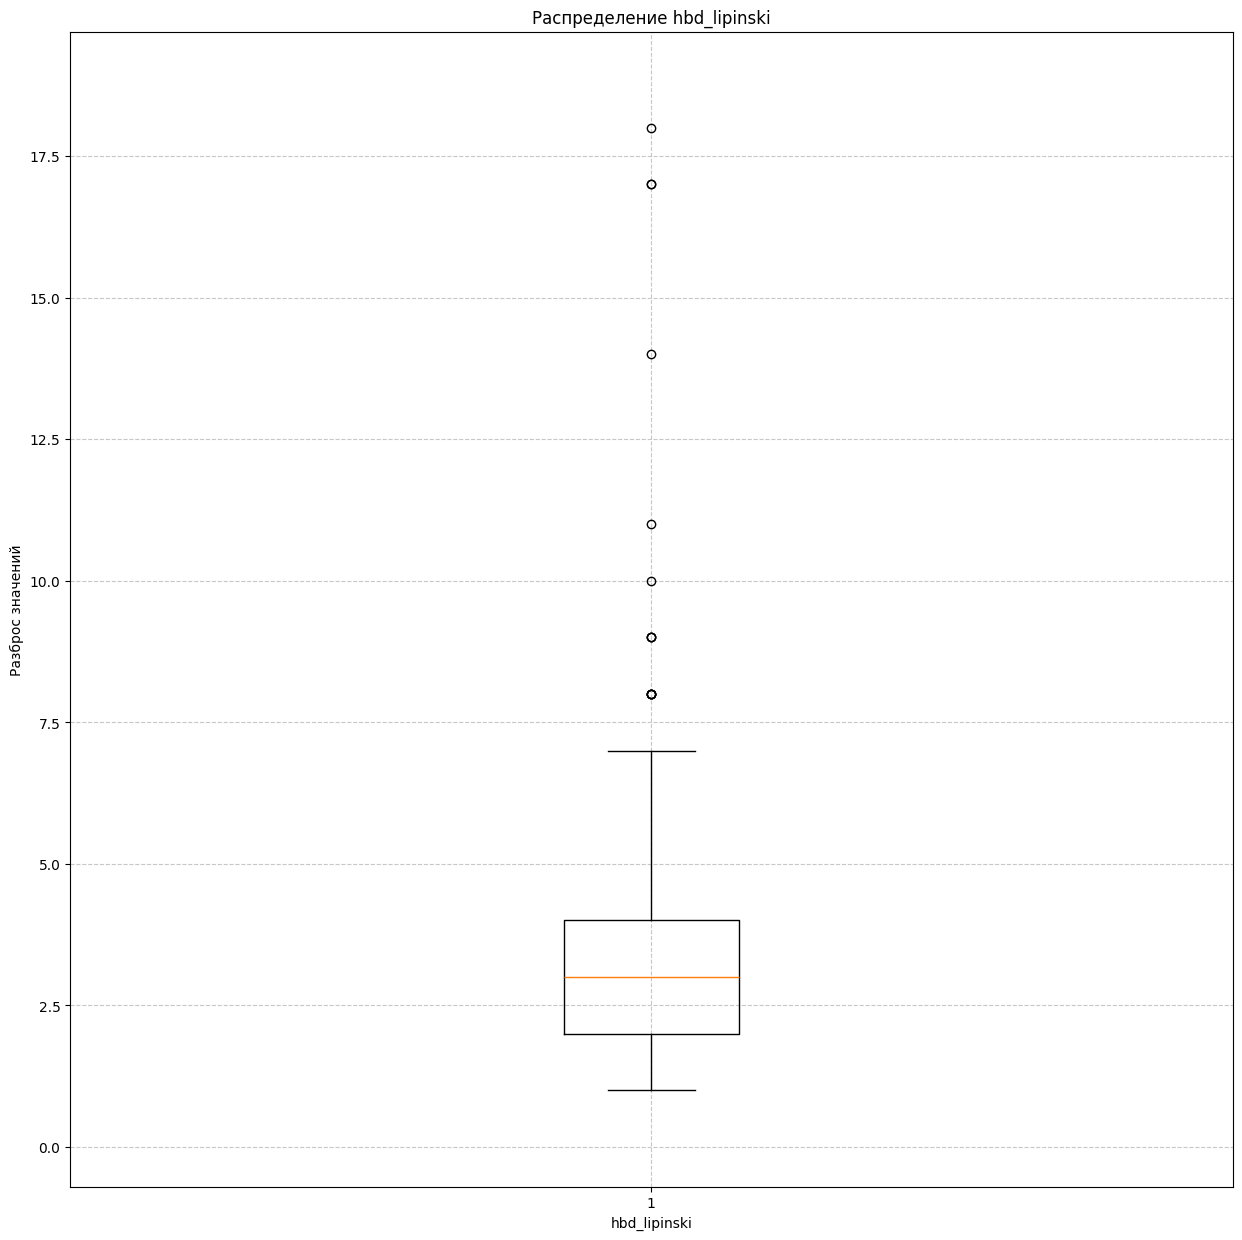

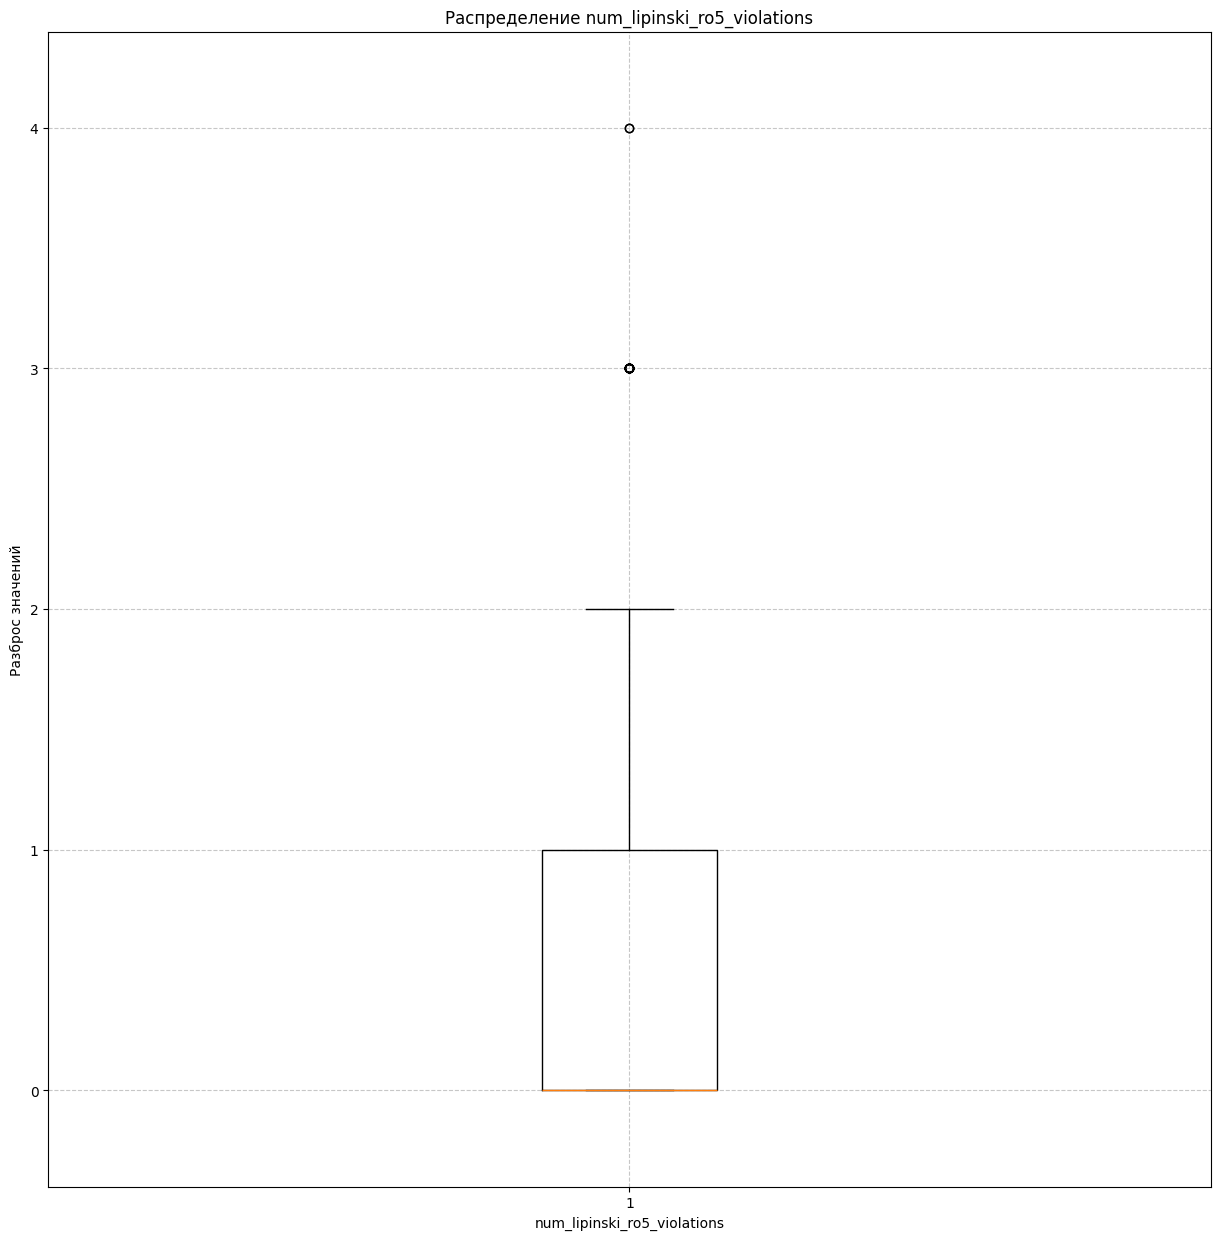

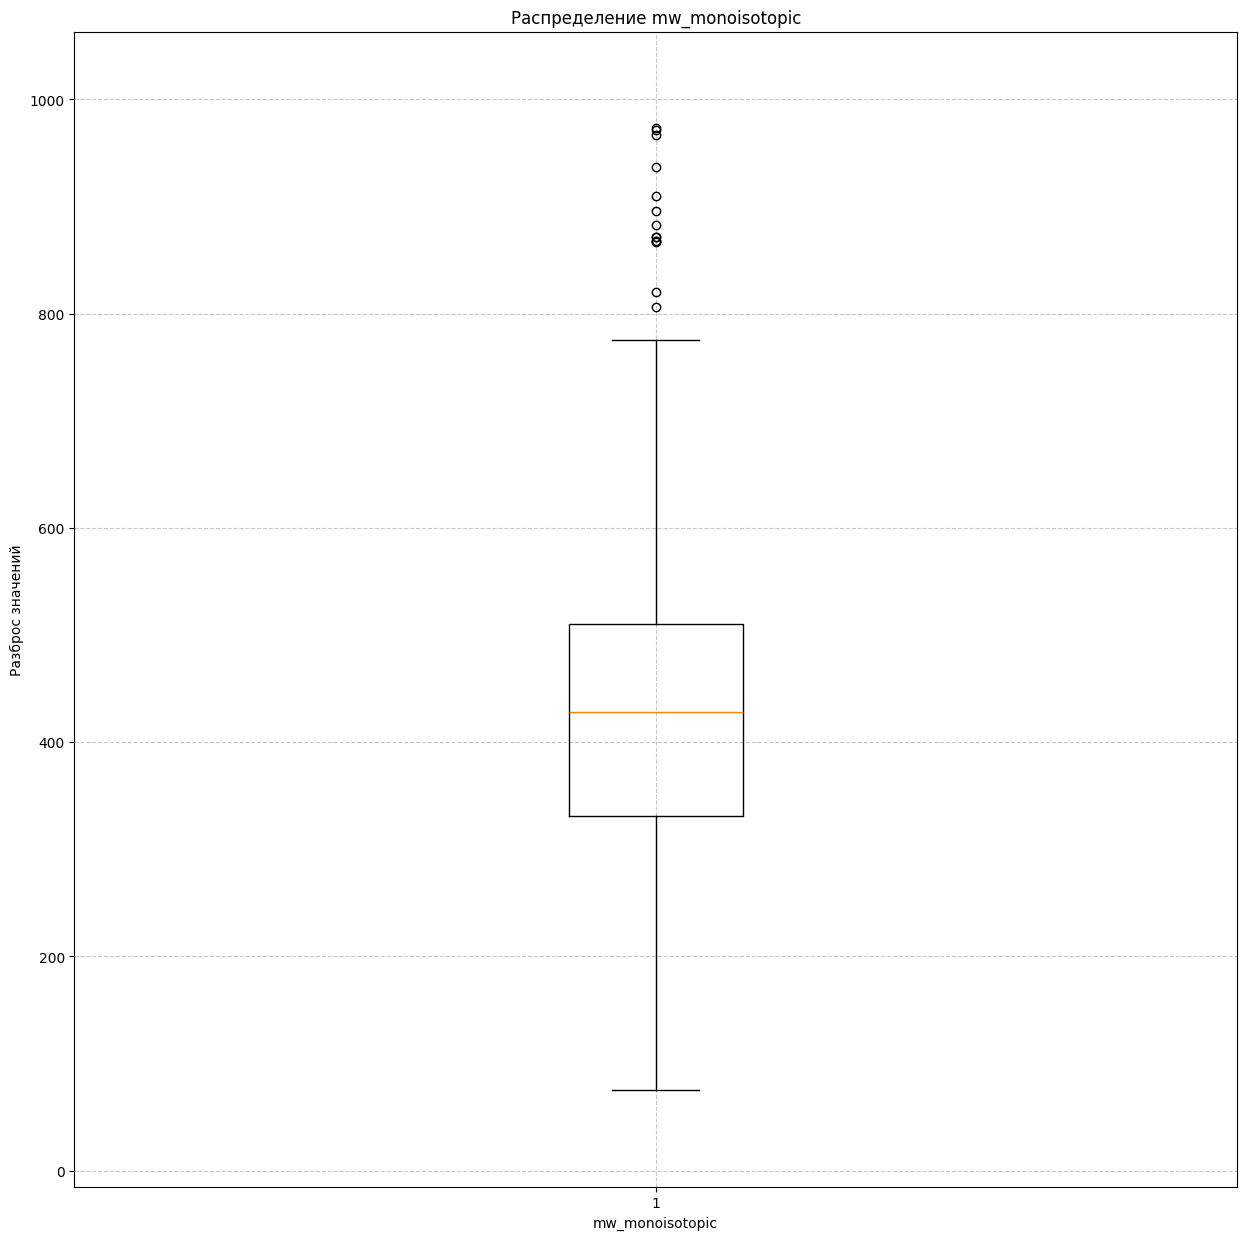

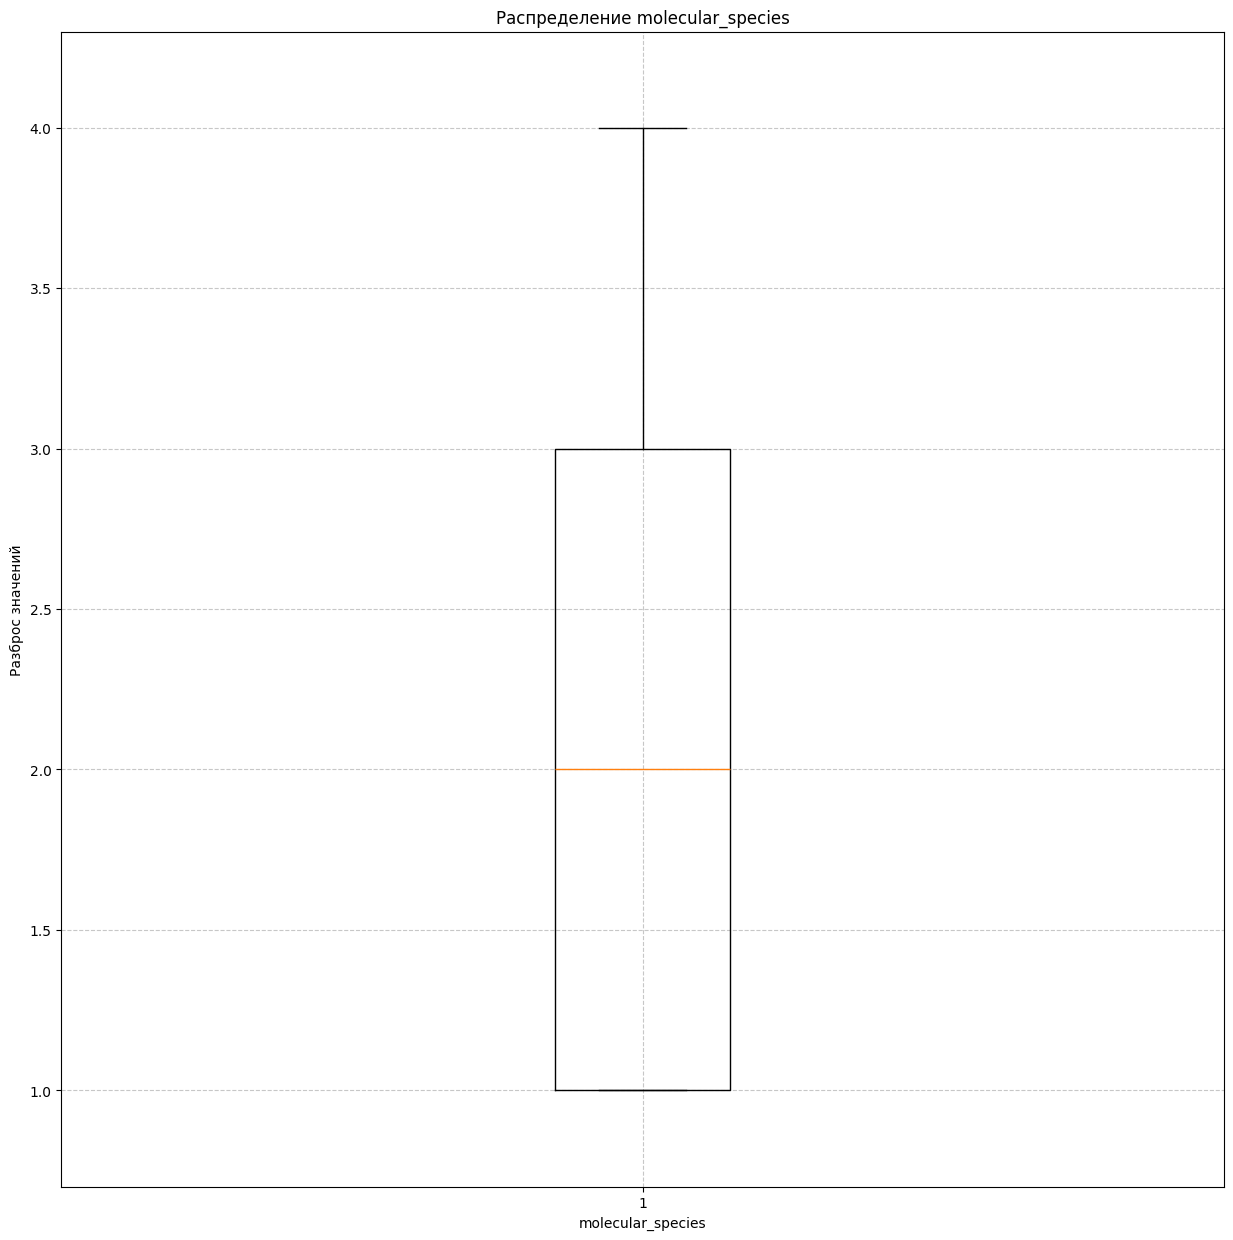

In [55]:
for col in df.select_dtypes(include=['number']):
    # print(df[col].head(), df[col].dtype)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.boxplot(df[col].dropna().values)

    ax.set_xlabel(col)
    ax.set_ylabel('Разброс значений')
    ax.set_title(f'Распределение {col}')


    padding = (df[col].max() - df[col].min()) * 0.1
    ax.set_ylim(df[col].min() - padding, df[col].max() + padding)
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.show()

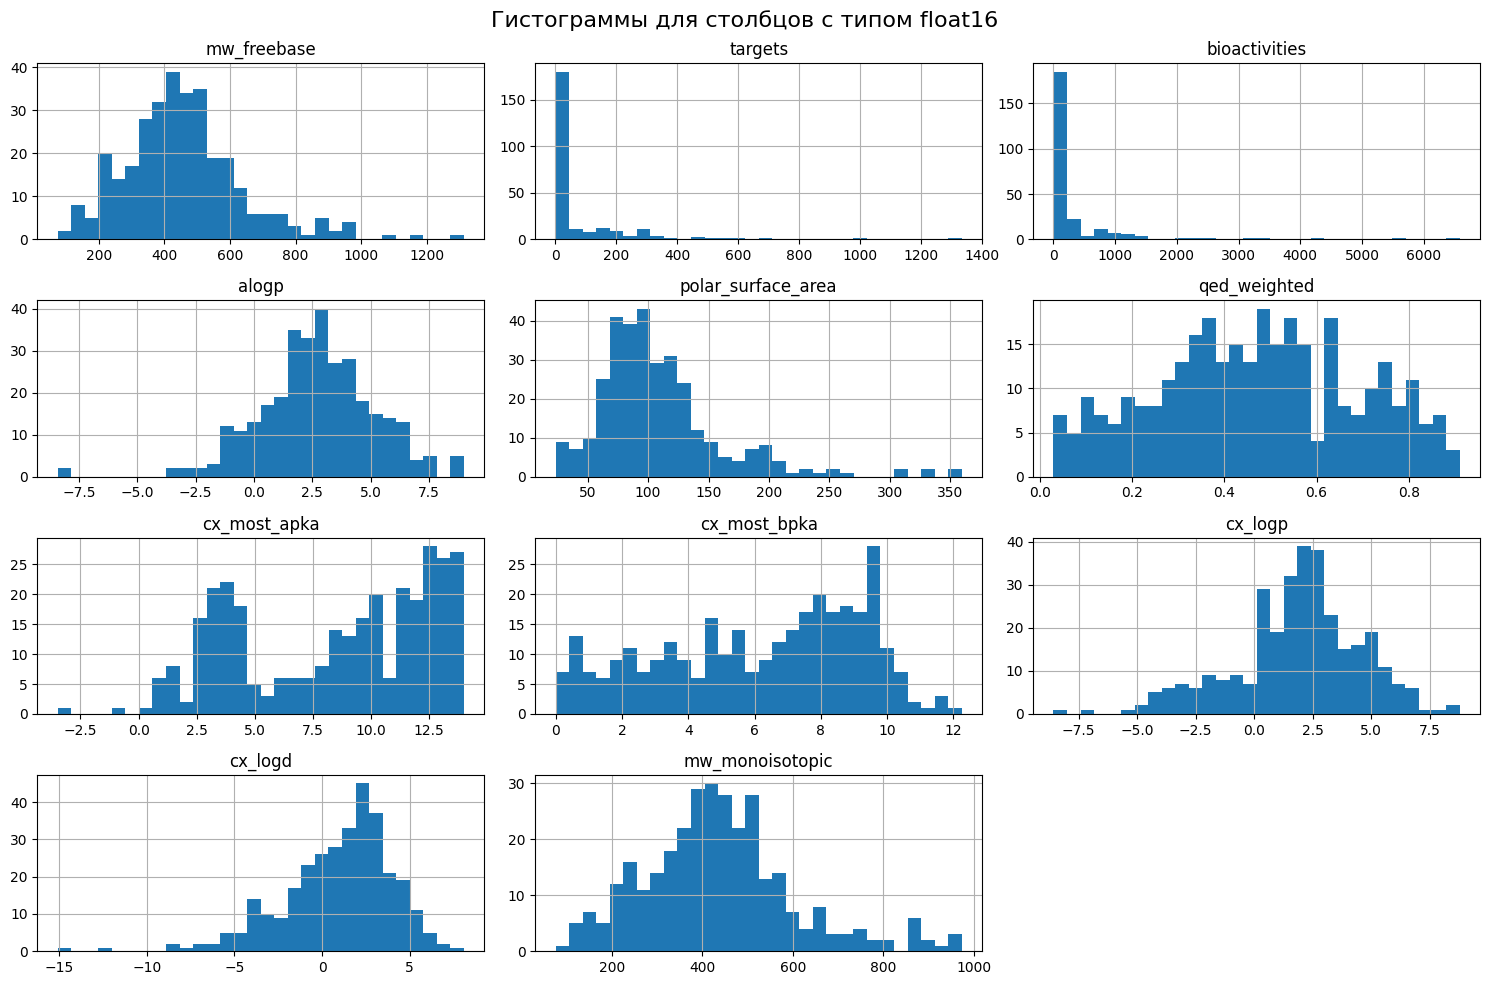

In [56]:
# Гистограммы с типом int8 не интересно смотреть. А вот с типом float16 можно посмотреть на выбросы
df[list(df.select_dtypes(include=["float16"]))].hist(figsize=(15, 10), bins=30)
plt.suptitle("Гистограммы для столбцов с типом float16", fontsize=16) 
plt.tight_layout()
plt.show()

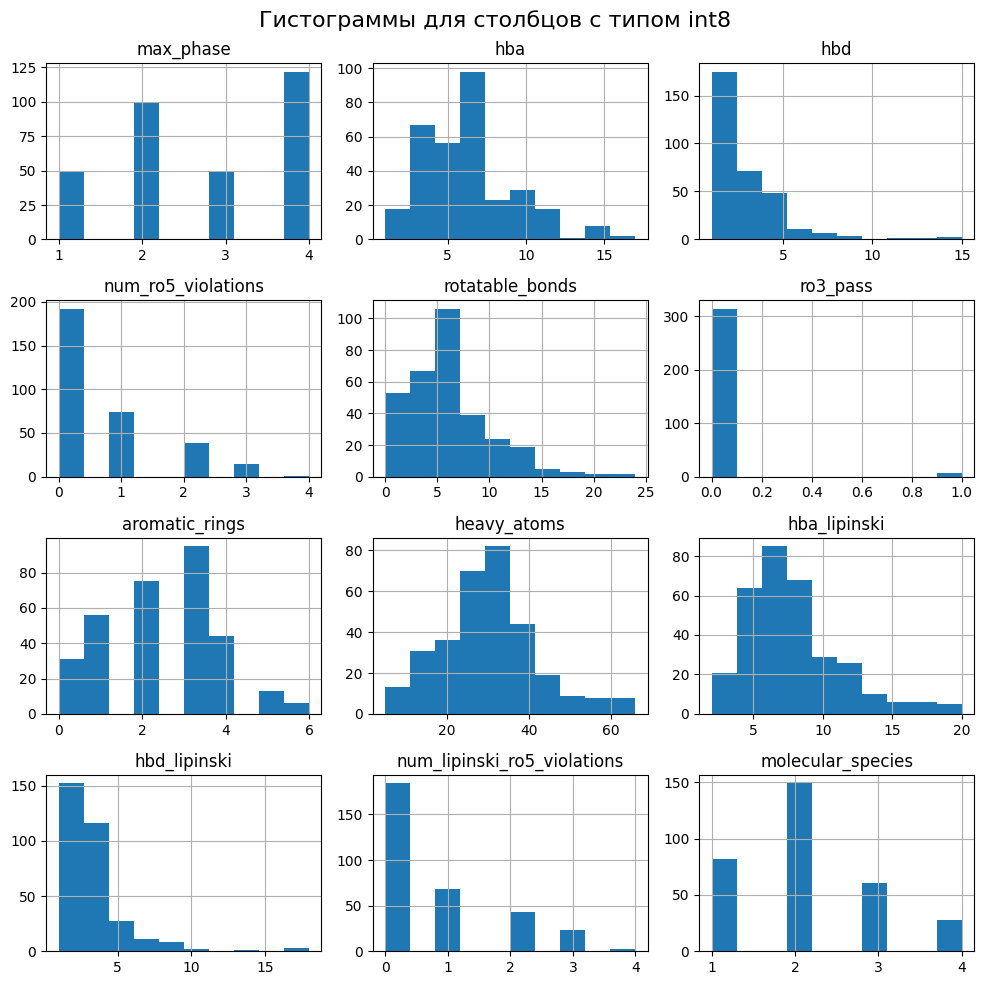

In [57]:
df[list(df.select_dtypes(include=["int8"]))].hist(figsize=(10, 10))
plt.suptitle("Гистограммы для столбцов с типом int8", fontsize=16) 
plt.tight_layout()
plt.show()

In [58]:
# Предположим наш target - mw_freebase. Тогда можно посмотрить графики корреляции тергета с фичами. 
# Строить такой график на весь датафрейм будет нечитабельно, трудно и долго...комп зависает
# pairplot = sns.pairplot(df.select_dtypes(include=['number']))
# pairplot.savefig("pairplot.png", dpi=300, bbox_inches='tight') 

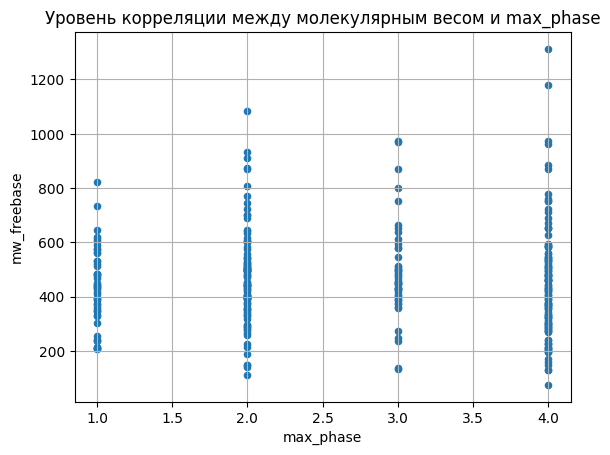

Уровень корреляции между молекулярным весом и max_phase: -0.0421117512917905


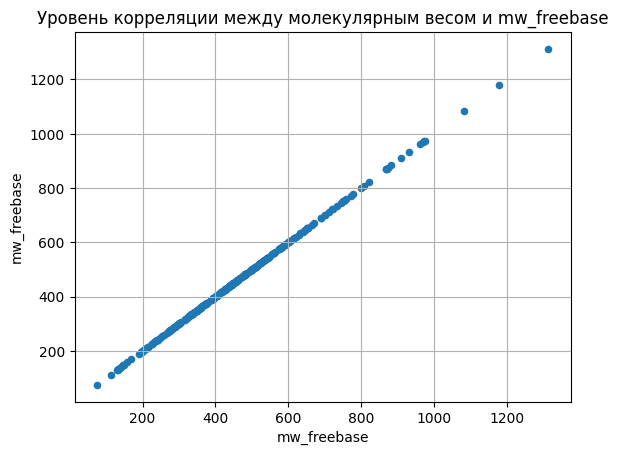

Уровень корреляции между молекулярным весом и mw_freebase: 1.0


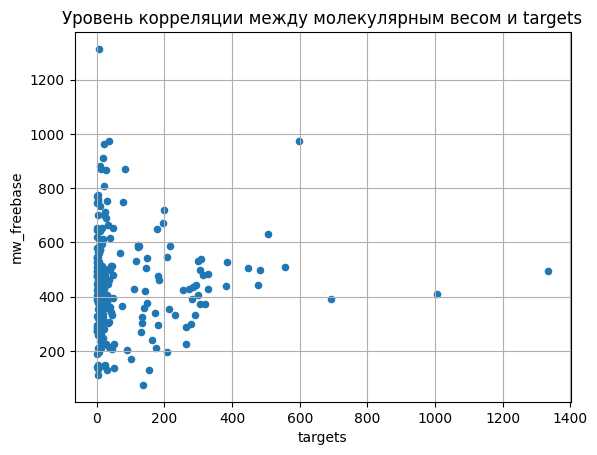

Уровень корреляции между молекулярным весом и targets: -0.04649229847776018


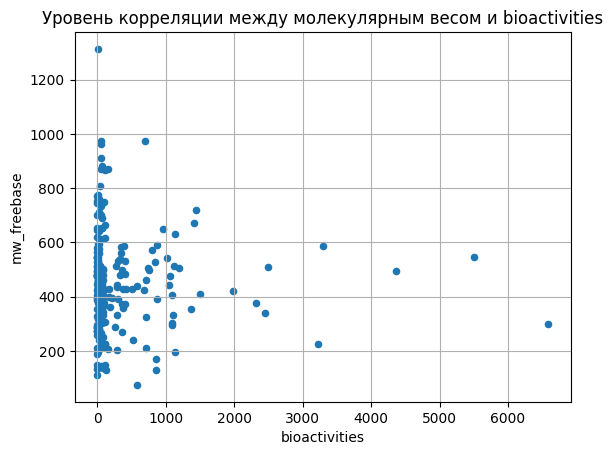

Уровень корреляции между молекулярным весом и bioactivities: -0.04429821803020717


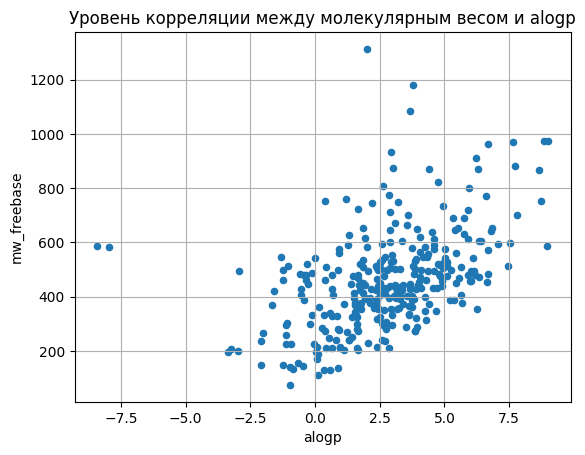

Уровень корреляции между молекулярным весом и alogp: 0.5079466356426242


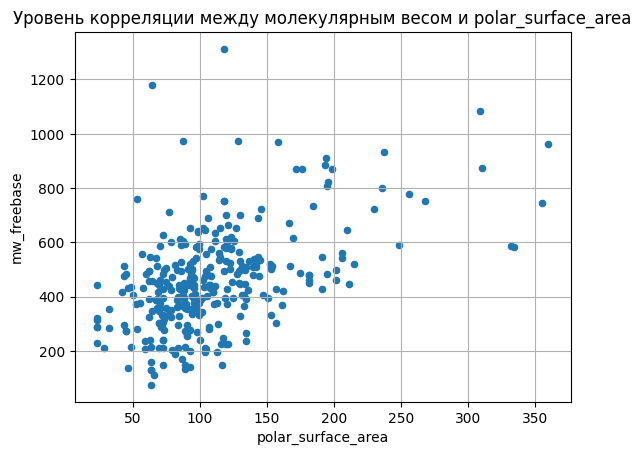

Уровень корреляции между молекулярным весом и polar_surface_area: 0.4864833191854615


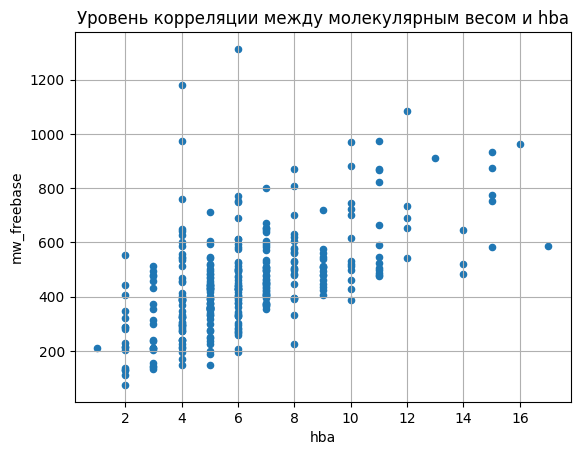

Уровень корреляции между молекулярным весом и hba: 0.5835944038645362


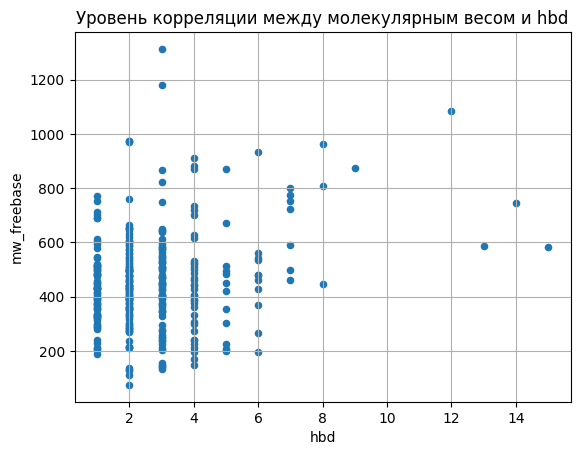

Уровень корреляции между молекулярным весом и hbd: 0.13199763808485712


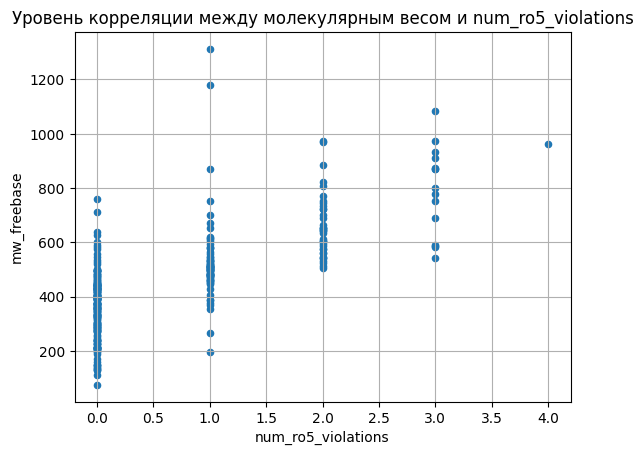

Уровень корреляции между молекулярным весом и num_ro5_violations: 0.7421957600497932


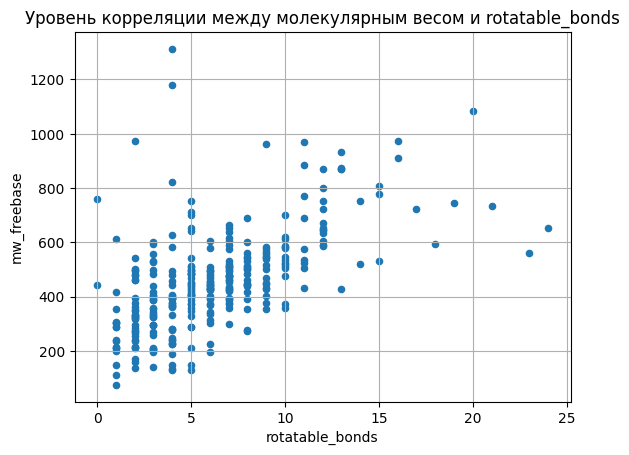

Уровень корреляции между молекулярным весом и rotatable_bonds: 0.6208442973237511


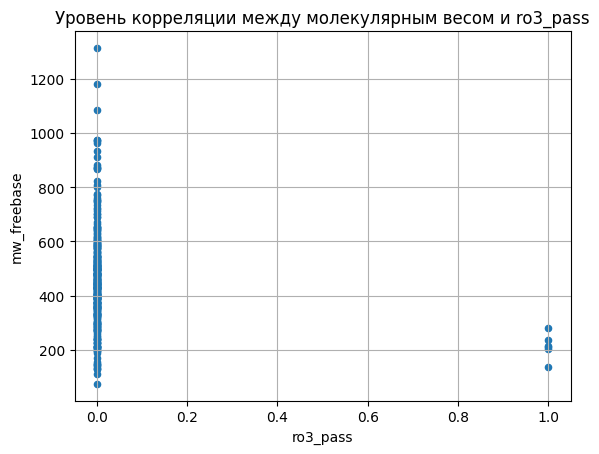

Уровень корреляции между молекулярным весом и ro3_pass: -0.20102010939128756


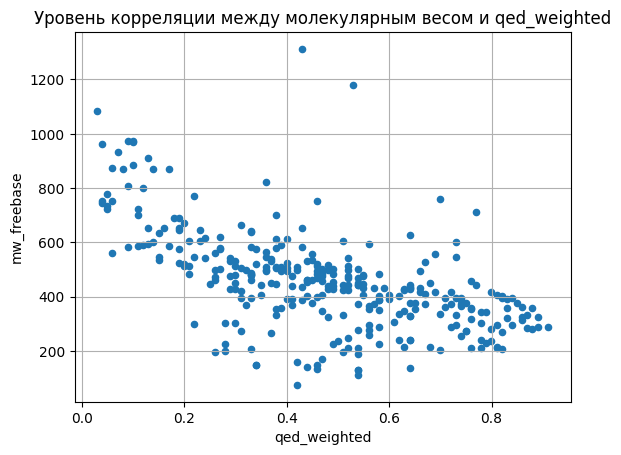

Уровень корреляции между молекулярным весом и qed_weighted: -0.6255858073777706


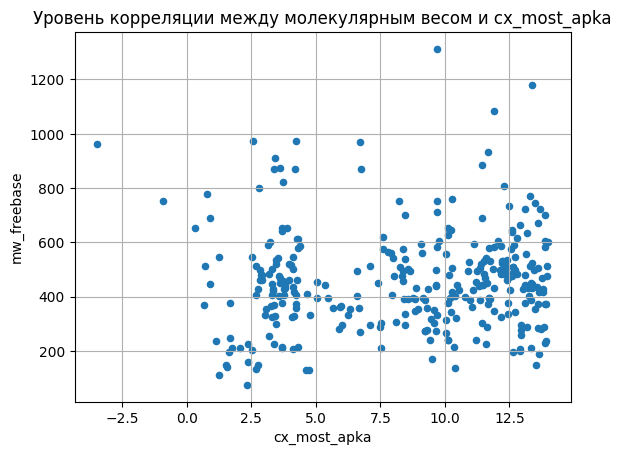

Уровень корреляции между молекулярным весом и cx_most_apka: 0.09091430121103322


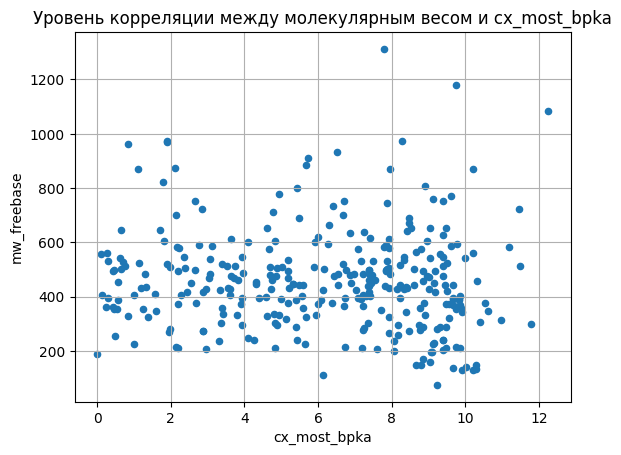

Уровень корреляции между молекулярным весом и cx_most_bpka: -0.10900157136054064


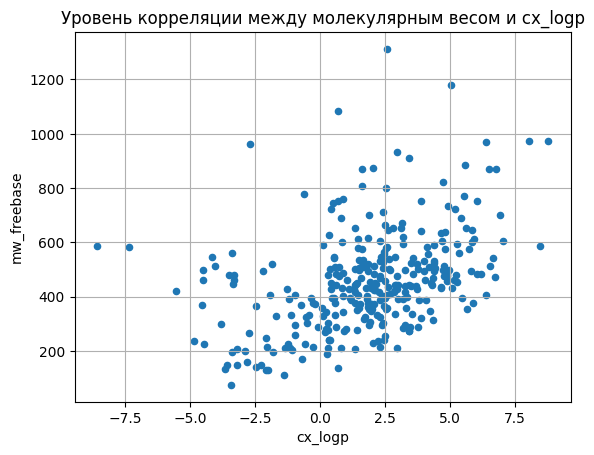

Уровень корреляции между молекулярным весом и cx_logp: 0.43607218374012835


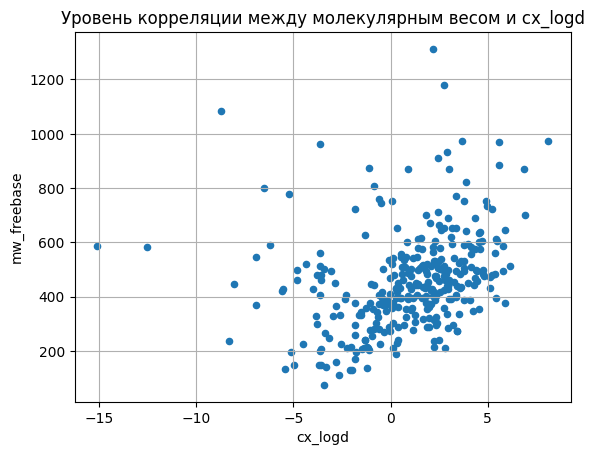

Уровень корреляции между молекулярным весом и cx_logd: 0.40518957324934735


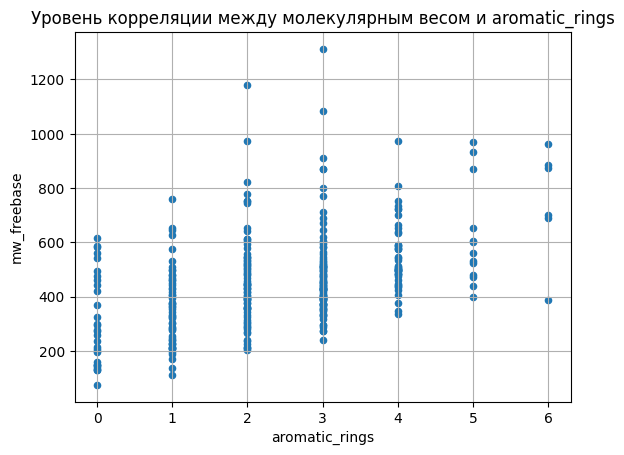

Уровень корреляции между молекулярным весом и aromatic_rings: 0.4745723287968086


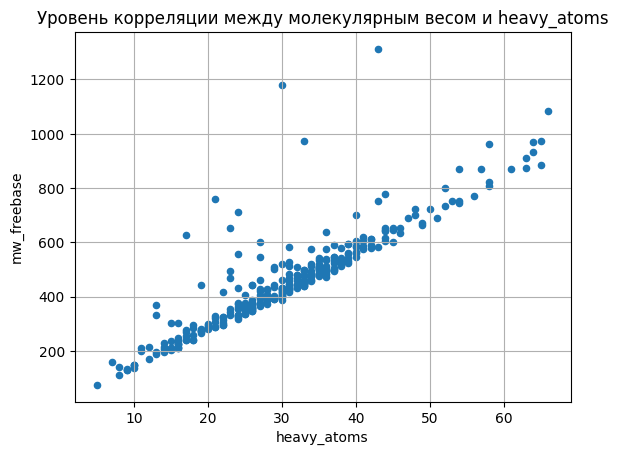

Уровень корреляции между молекулярным весом и heavy_atoms: 0.9092647547983167


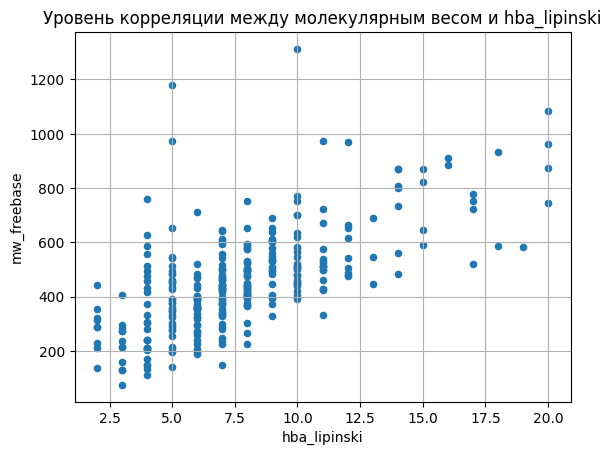

Уровень корреляции между молекулярным весом и hba_lipinski: 0.6537270185646489


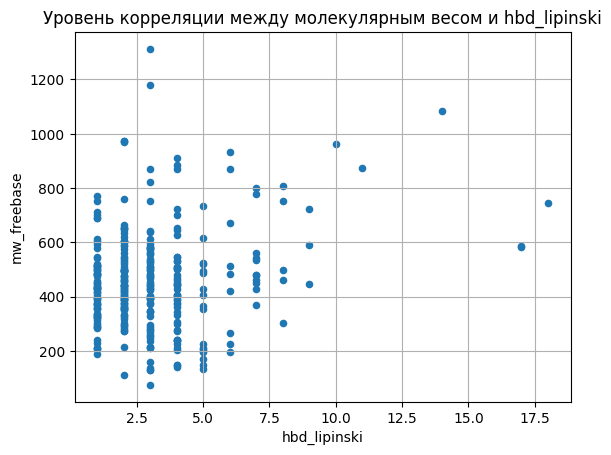

Уровень корреляции между молекулярным весом и hbd_lipinski: 0.07135763548756606


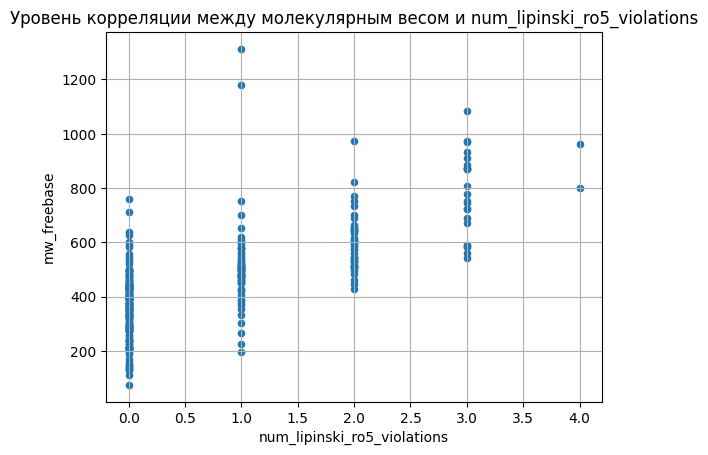

Уровень корреляции между молекулярным весом и num_lipinski_ro5_violations: 0.7276864658179379


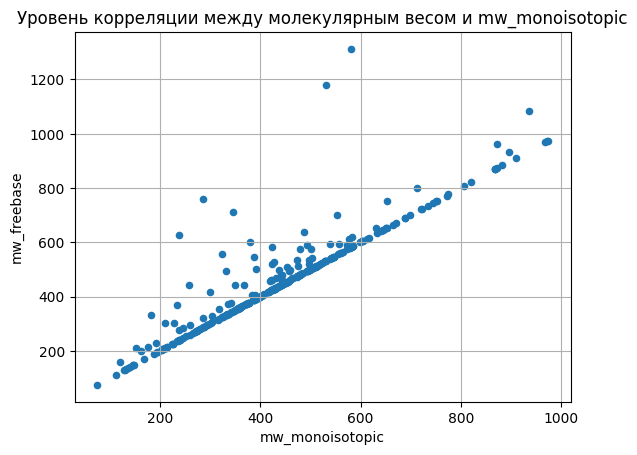

Уровень корреляции между молекулярным весом и mw_monoisotopic: 0.9327286497215311


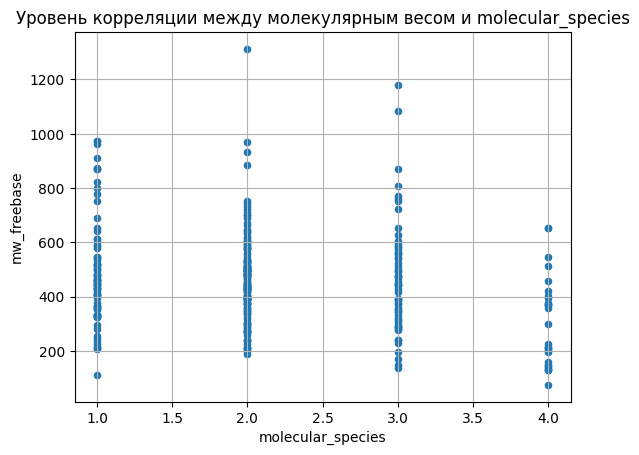

Уровень корреляции между молекулярным весом и molecular_species: -0.1660813169752408


In [59]:
col_numbers = list(df.select_dtypes(include=['number']))
for col in col_numbers:
    # т.к данные скошены, то применяем коэффициент корреляции Спирмена
    res = df['mw_freebase'].corr(df[col], method='spearman')
    df.plot(
        title = f'Уровень корреляции между молекулярным весом и {col}', 
        kind='scatter' ,
        x = col, 
        y ='mw_freebase',
    )
    plt.grid(True)
    plt.show()
    print(f'Уровень корреляции между молекулярным весом и {col}: {res}')

> * На некоторых графиках видны отклонения. Это либо из-за химической структуры, либо из-за погрешностей

# 7. Итоговый датафрем

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chembl_id                    320 non-null    object 
 1   max_phase                    320 non-null    int8   
 2   mw_freebase                  320 non-null    float16
 3   targets                      250 non-null    float16
 4   bioactivities                250 non-null    float16
 5   alogp                        320 non-null    float16
 6   polar_surface_area           320 non-null    float16
 7   hba                          320 non-null    int8   
 8   hbd                          320 non-null    int8   
 9   num_ro5_violations           320 non-null    int8   
 10  rotatable_bonds              320 non-null    int8   
 11  ro3_pass                     320 non-null    int8   
 12  qed_weighted                 320 non-null    float16
 13  cx_most_apka        

> * Нужно удалить колонки targets и bioactivities. После проведения дополнительного анализа осталось непонятно что за ними скрывается. По базе данных предполагается, что под `targets` скрывается название мишени, аналогично с `bioactivities`

In [61]:
# И удаляем id, так как для ML он не понадобится
df = df.drop(['targets', 'bioactivities', 'chembl_id'], axis = 1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   max_phase                    320 non-null    int8   
 1   mw_freebase                  320 non-null    float16
 2   alogp                        320 non-null    float16
 3   polar_surface_area           320 non-null    float16
 4   hba                          320 non-null    int8   
 5   hbd                          320 non-null    int8   
 6   num_ro5_violations           320 non-null    int8   
 7   rotatable_bonds              320 non-null    int8   
 8   ro3_pass                     320 non-null    int8   
 9   qed_weighted                 320 non-null    float16
 10  cx_most_apka                 320 non-null    float16
 11  cx_most_bpka                 320 non-null    float16
 12  cx_logp                      320 non-null    float16
 13  cx_logd             

In [63]:
length_new_df = len(df)
f'Процент удаленных данных: {(100 - (length_new_df * 100 / length_old_df)):.2f}%'

'Процент удаленных данных: 68.00%'

In [64]:
f"Конечный объем даты после обработки: {(df.memory_usage(deep = True).sum() / (1024 ** 2)):.2f} Mb"

'Конечный объем даты после обработки: 0.01 Mb'

In [65]:
df.to_pickle("dataset_var_4.pkl")